#Multi-Class and Binary Loan Risk Prediction

**Objective:** To develop a machine learning model that assesses loan risk by predicting loan outcomes and identifying high-risk borrowers, with emphasis on correctly detecting bad loans under severe class imbalance.

###Dataset Overview

The dataset contains 466,285 rows and 75 columns of loan application and repayment data. It consists of variables such as loan amounts, interest rates, borrower income, repayment history, credit grade, among others. Each of these features provides important information for identifying patterns associated with loan repayment outcome, and good vs bad loan risk assesment.

###Key Features

**out_prncp:** Outstanding principal of the loan.

**out_prncp_inv:** Outstanding principal from investors.

**recoveries:** Amount recovered from defaulted loans.

**inq_last_6mth:** Number of inquiries in the past 6 months.

**sub_grade:** Borrower’s credit sub-grade.

**total_rev_hi_lim:** Total revolving credit limit.

**last_pymnt_amnt:** Amount of the last payment made.

###Dataset Information

- **Unnamed: 0:** Row index / serial number

- **id:** Loan record ID

- **member_id:** Unique borrower ID

- **loan_amnt:** Loan amount requested by borrower

- **funded_amnt:** Loan amount funded by investors

- **funded_amnt_inv:** Loan amount funded by investors (individual portion)

- **term:** Loan term (36 months / 60 months)

- **int_rate:** Interest rate on the loan

- **installment:** Monthly payment owed by borrower

- **grade:** Loan grade assigned by lending platform (A–G)

- **sub_grade:** Loan sub-grade (A1, G5)

- **emp_title:** Borrower’s job title

- **emp_length:** Borrower’s employment length

- **home_ownership:** Home ownership status (RENT, OWN, MORTGAGE, etc.)

- **annual_inc:** Borrower’s annual income

- **verification_status:** Whether income was verified

- **issue_d:** Loan issue date

- **loan_status:** Loan status (Fully Paid, Charged Off, etc.)

- **pymnt_plan:** Whether borrower has a payment plan (y/n)

- **url:** URL of the loan record on the platform

- **desc:** Loan description provided by borrower

- **purpose:** Reason for loan (debt, car, credit card, etc.)

- **title:** Loan title given by borrower

- **zip_code:** Borrower’s zip code

- **addr_state:** Borrower’s state

- **dti:** Debt-to-income ratio

- **delinq_2yrs:** Number of delinquencies in past 2 years

- **earliest_cr_line:** Date of borrower’s earliest credit line

- **inq_last_6mths:** Number of inquiries in last 6 months

- **mths_since_last_delinq:** Months since last delinquency

- **mths_since_last_record:** Months since last public record

- **open_acc:** Number of open credit lines in borrower’s credit file

- **pub_rec:** Number of derogatory public records

- **revol_bal:** Total revolving balance on credit accounts

- **revol_util:** Revolving line utilization rate

- **total_acc:** Total number of credit lines currently in borrower’s credit file

- **initial_list_status:** Initial listing status of the loan

- **out_prncp:** Remaining outstanding principal on the loan

- **out_prncp_inv:** Remaining outstanding principal funded by investors

- **total_pymnt:** Payments received to date for principal + interest

- **total_pymnt_inv:** Payments received by investors

- **total_rec_prncp:** Total principal received

- **total_rec_int:** Total interest received

- **total_rec_late_fee:** Total late fees received

- **recoveries:** Amount recovered from defaults

- **collection_recovery_fee:** Collection fees recovered

- **last_pymnt_d:** Date of last payment received

- **last_pymnt_amnt:** Amount of last payment received

- **next_pymnt_d:** Date of next scheduled payment

- **last_credit_pull_d:** Date of last credit bureau pull

- **collections_12_mths_ex_med:** Number of collections in past 12 months (excluding medical)

- **mths_since_last_major_derog:** Months since last major derogatory public record

- **policy_code:** Lending platform policy code

- **application_type:** Individual or joint loan application

- **annual_inc_joint:** Joint applicant annual income (all missing)

- **dti_joint:** Joint debt-to-income ratio (all missing)

- **verification_status_joint:** Verification status for joint applicant (all missing)

- **acc_now_delinq:** Number of accounts currently delinquent

- **tot_coll_amt:** Total collection amounts ever owed

- **tot_cur_bal:** Total current balance of all accounts

- **open_acc_6m:** Number of accounts opened in last 6 months (all missing)

- **open_il_6m:** Number of installment accounts opened in last 6 months (all missing)

- **open_il_12m:** Number of installment accounts opened in last 12 months (all missing)

- **open_il_24m:** Number of installment accounts opened in last 24 months (all missing)

- **mths_since_rcnt_il:** Months since most recent installment account (all missing)

- **total_bal_il:** Total balance of installment accounts (all missing)

- **il_util:** Installment account utilization (all missing)

- **open_rv_12m:** Number of revolving accounts opened in last 12 months (all missing)

- **open_rv_24m:** Number of revolving accounts opened in last 24 months (all missing)

- **max_bal_bc:** Maximum balance on bankcard (all missing)

- **all_util:** Total credit utilization (all missing)

- **total_rev_hi_lim:** Total revolving high credit / credit limit

- **inq_fi:** Number of finance inquiries (all missing)

- **total_cu_tl:** Total current credit lines (all missing)

- **inq_last_12m:** Number of inquiries in last 12 months (all missing)

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

###Importing the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')
df.head()

/tmp/ipython-input-3472922752.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


##Data Cleaning

In [ ]:
df.drop(['Unnamed: 0', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
          'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m',
          'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m',
          'open_il_12m', 'open_il_6m', 'open_acc_6m', 'verification_status_joint',
          'dti_joint', 'annual_inc_joint', 'url', 'desc', 'id', 'member_id',
          'title', 'zip_code', 'emp_title', 'issue_d', 'addr_state',
          'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d',
          'mths_since_last_major_derog'],
              axis=1, inplace=True)

In [ ]:
df['has_pub_record'] = df['mths_since_last_record'].notna().astype(int)
df.drop('mths_since_last_record', axis=1, inplace=True)

In [ ]:
df['has_been_delinq'] = df['mths_since_last_delinq'].notna().astype(int)
df.drop('mths_since_last_delinq', axis=1, inplace=True)

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,has_pub_record,has_been_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1


###Data Spliting

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,has_pub_record,has_been_delinq
427211,24000,24000,24000.0,36 months,8.90,762.08,A,A5,3 years,MORTGAGE,77000.0,Source Verified,Current,n,debt_consolidation,21.91,0.0,1.0,20.0,0.0,30489,53.5,32.0,f,10098.30,10098.30,16765.76000,16765.76,13901.70,2864.06,0.00,0.00,0.000,762.08,0.0,1,INDIVIDUAL,0.0,0.0,348253.0,57000.0,0,0
206088,10000,10000,10000.0,36 months,14.33,343.39,C,C1,6 years,MORTGAGE,112000.0,Not Verified,Fully Paid,n,debt_consolidation,7.49,1.0,2.0,15.0,0.0,15836,53.1,38.0,f,0.00,0.00,12357.02066,12357.02,10000.00,2357.02,0.00,0.00,0.000,355.11,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
136020,20425,20425,20425.0,36 months,8.90,648.56,A,A5,10+ years,MORTGAGE,84000.0,Verified,Current,n,debt_consolidation,14.83,0.0,1.0,9.0,0.0,29813,89.5,20.0,f,3183.62,3183.62,20090.40000,20090.40,17241.38,2849.02,0.00,0.00,0.000,648.56,0.0,1,INDIVIDUAL,0.0,0.0,385187.0,33300.0,0,1
412305,17200,17200,17200.0,36 months,16.59,609.73,D,D1,7 years,RENT,43000.0,Source Verified,Late (31-120 days),n,debt_consolidation,13.68,1.0,3.0,9.0,0.0,7523,60.2,13.0,f,9459.50,9459.50,11615.36000,11615.36,7740.50,3844.37,30.49,0.00,0.000,640.22,0.0,1,INDIVIDUAL,0.0,0.0,22958.0,12500.0,0,1
36159,8400,8400,7450.0,36 months,12.84,282.40,C,C2,5 years,MORTGAGE,94000.0,Verified,Charged Off,n,educational,22.54,0.0,1.0,14.0,0.0,65621,81.5,30.0,f,0.00,0.00,5422.21000,4808.80,3566.58,1231.84,0.00,623.79,28.256,282.40,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0


###Data Preparation

In [ ]:
df_train.to_csv('Default_Probability_Train_set.csv', index=False)

In [ ]:
df_test.to_csv('Default_Probability_Test_set', index=False)

###Importing Train Set

In [ ]:
df_train = pd.read_csv('/content/Default_Probability_Train_set.csv')
df_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,has_pub_record,has_been_delinq
0,24000,24000,24000.0,36 months,8.90,762.08,A,A5,3 years,MORTGAGE,77000.0,Source Verified,Current,n,debt_consolidation,21.91,0.0,1.0,20.0,0.0,30489,53.5,32.0,f,10098.30,10098.30,16765.76000,16765.76,13901.70,2864.06,0.00,0.00,0.000,762.08,0.0,1,INDIVIDUAL,0.0,0.0,348253.0,57000.0,0,0
1,10000,10000,10000.0,36 months,14.33,343.39,C,C1,6 years,MORTGAGE,112000.0,Not Verified,Fully Paid,n,debt_consolidation,7.49,1.0,2.0,15.0,0.0,15836,53.1,38.0,f,0.00,0.00,12357.02066,12357.02,10000.00,2357.02,0.00,0.00,0.000,355.11,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
2,20425,20425,20425.0,36 months,8.90,648.56,A,A5,10+ years,MORTGAGE,84000.0,Verified,Current,n,debt_consolidation,14.83,0.0,1.0,9.0,0.0,29813,89.5,20.0,f,3183.62,3183.62,20090.40000,20090.40,17241.38,2849.02,0.00,0.00,0.000,648.56,0.0,1,INDIVIDUAL,0.0,0.0,385187.0,33300.0,0,1
3,17200,17200,17200.0,36 months,16.59,609.73,D,D1,7 years,RENT,43000.0,Source Verified,Late (31-120 days),n,debt_consolidation,13.68,1.0,3.0,9.0,0.0,7523,60.2,13.0,f,9459.50,9459.50,11615.36000,11615.36,7740.50,3844.37,30.49,0.00,0.000,640.22,0.0,1,INDIVIDUAL,0.0,0.0,22958.0,12500.0,0,1
4,8400,8400,7450.0,36 months,12.84,282.40,C,C2,5 years,MORTGAGE,94000.0,Verified,Charged Off,n,educational,22.54,0.0,1.0,14.0,0.0,65621,81.5,30.0,f,0.00,0.00,5422.21000,4808.80,3566.58,1231.84,0.00,623.79,28.256,282.40,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0


##Exploratory Data Analysis

Numerical Analysis

In [ ]:
df_train_num = df_train._get_numeric_data()

Distribution of numerical variables

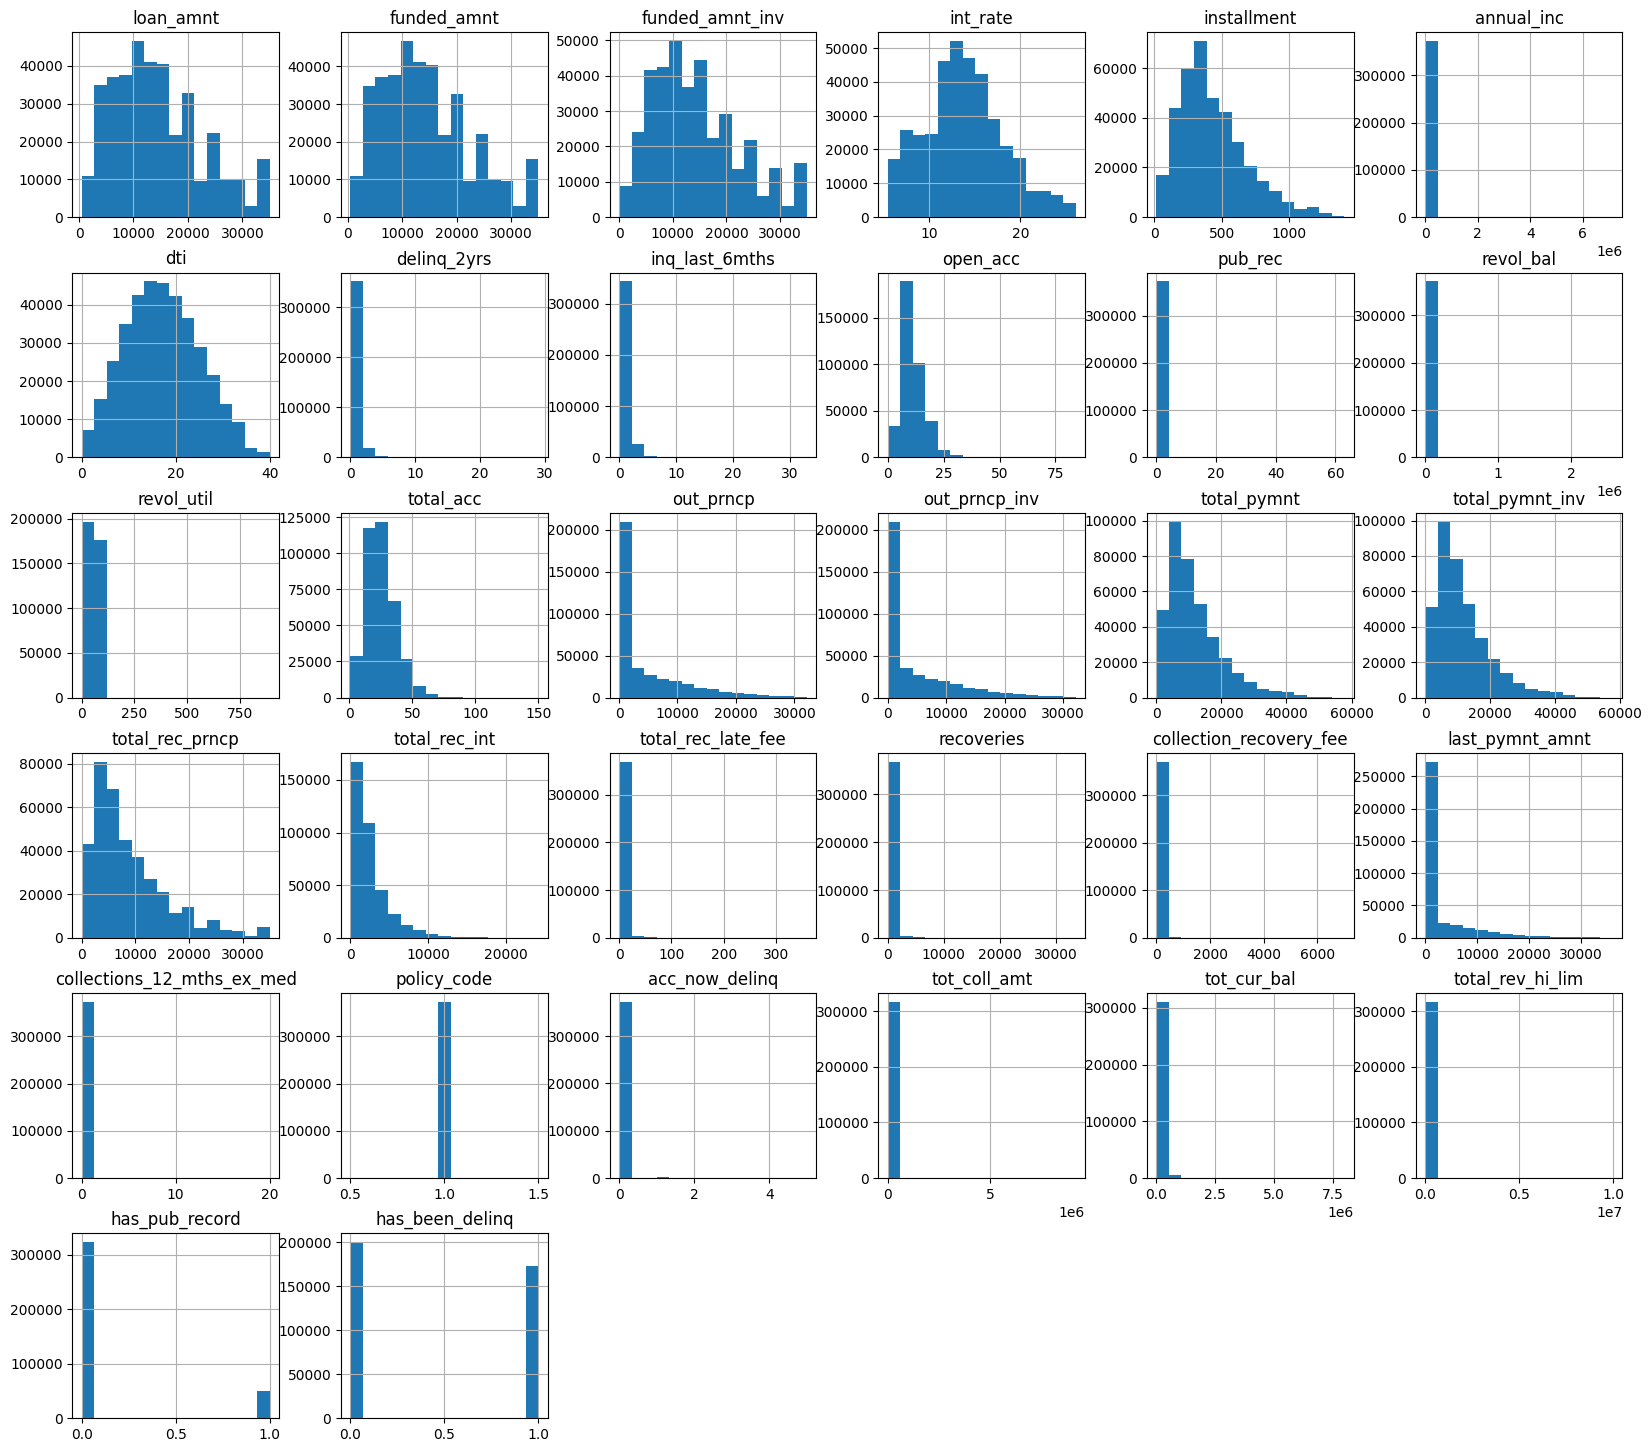

In [ ]:
df_train_num.hist(bins=15, figsize=(20,18))
plt.show()

Categorical Analysis

In [ ]:
df_train_cat = df_train.select_dtypes('object')

Visualization of categorical variables

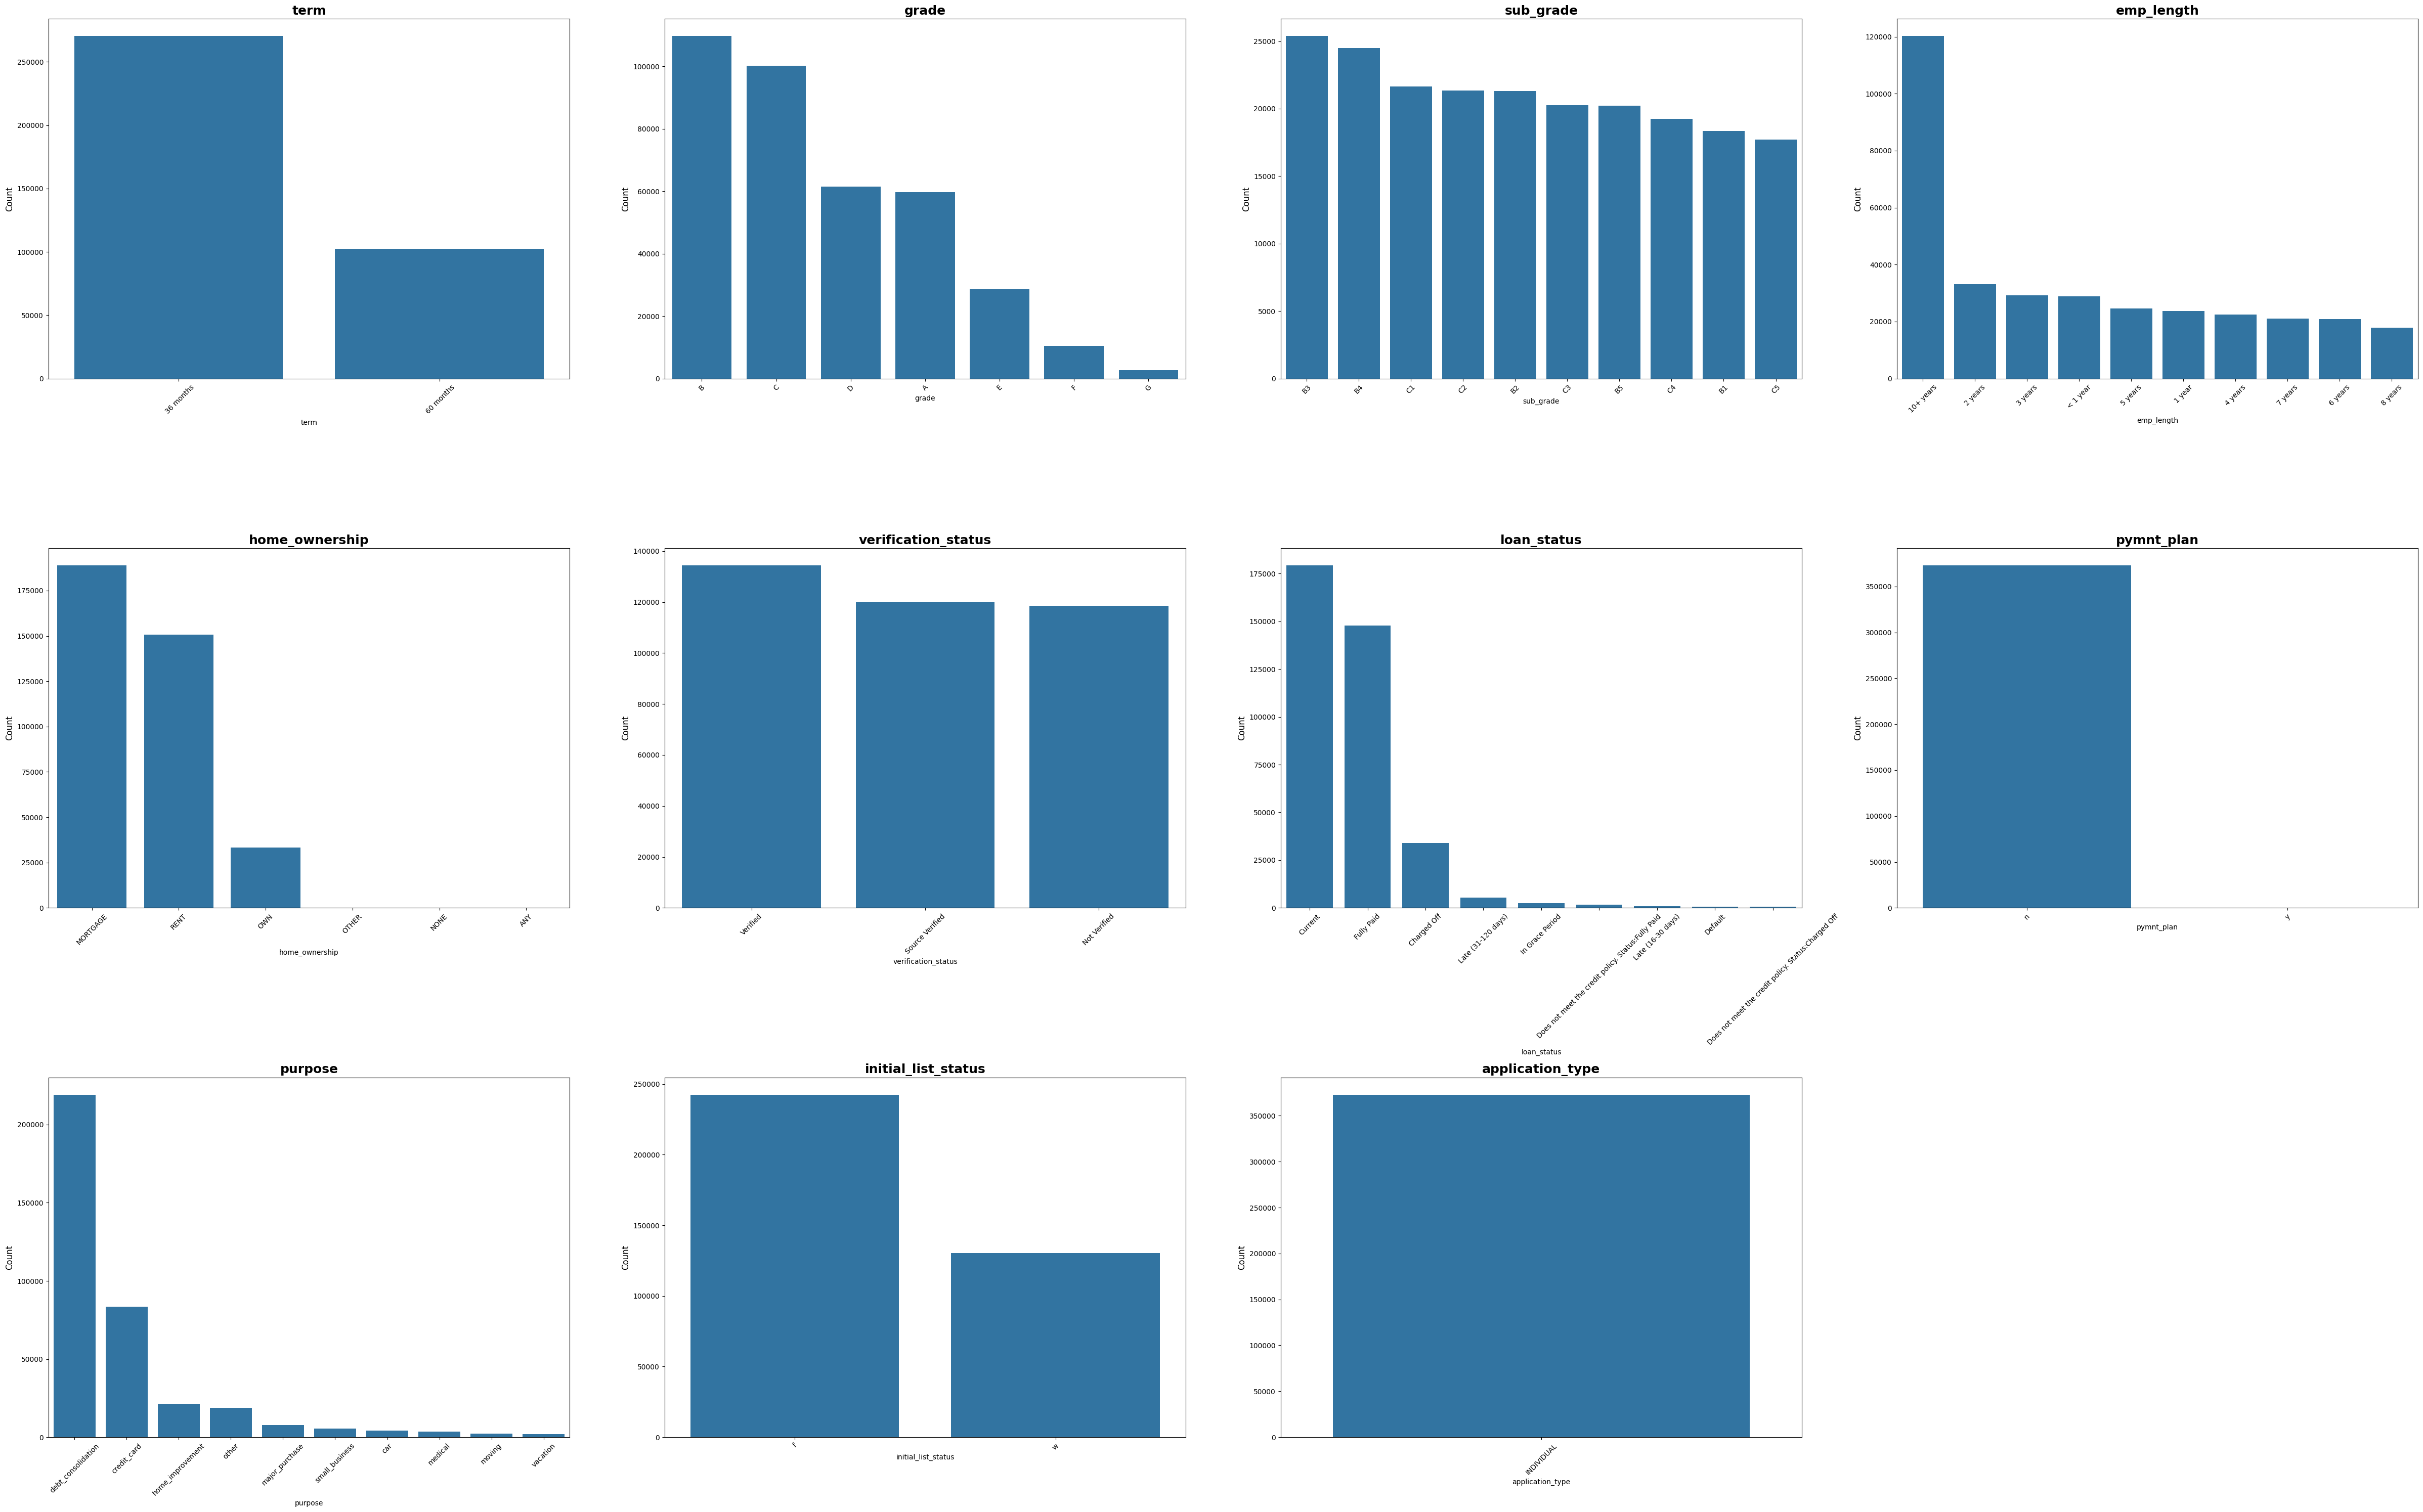

In [ ]:
train_cat = ['term', 'grade', 'sub_grade', 'emp_length','home_ownership', 'verification_status',
              'loan_status', 'pymnt_plan', 'purpose','initial_list_status', 'application_type']

n_cols = 4
n_rows = (len(train_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(12*n_cols, 10*n_rows))

for i, col in enumerate(train_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df_train, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=18, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Target Variable Distribution

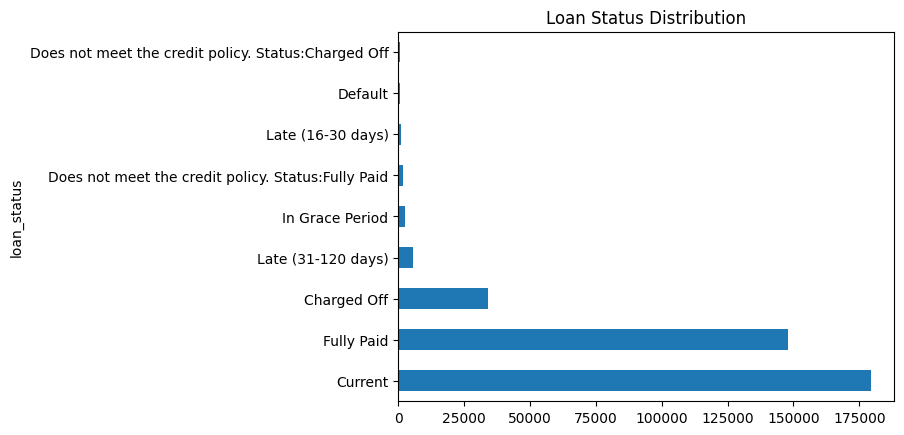

In [ ]:
df_train['loan_status'].value_counts().plot(kind='barh')
plt.title('Loan Status Distribution')
plt.show()

##Pre-Processing

In [ ]:
df_train['loan_status'].value_counts()

,count
loan_status,
Current,179332
Fully Paid,147833
Charged Off,34006
Late (31-120 days),5500
In Grace Period,2493
Does not meet the credit policy. Status:Fully Paid,1611
Late (16-30 days),981
Default,659
Does not meet the credit policy. Status:Charged Off,613


In [ ]:
target_map = {'Current':0, 'Fully Paid':1, 'Charged Off':2, 'Late (31-120 days)':3,
              'In Grace Period':4, 'Does not meet the credit policy. Status:Fully Paid':5, 'Late (16-30 days)':6,
              'Default':7, 'Does not meet the credit policy. Status:Charged Off':8}

In [ ]:
df_train['emp_length'].value_counts()

,count
emp_length,
10+ years,120245
2 years,33078
3 years,29205
< 1 year,28912
5 years,24602
1 year,23654
4 years,22468
7 years,21049
6 years,20887


In [ ]:
emp_map = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
            '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df_train['emp_length'] = df_train['emp_length'].str.strip()
df_train['emp_length'] = df_train['emp_length'].map(emp_map)



###Preprocessing

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
                  ('1', SimpleImputer(strategy='constant', fill_value=-1), ['emp_length']),
                  ('2', SimpleImputer(strategy='constant', fill_value=0), ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'collections_12_mths_ex_med', 'acc_now_delinq']),
                  ('3', SimpleImputer(strategy='median', fill_value=-1), ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'revol_util']),
                  ('ordinal', OrdinalEncoder(), ['grade', 'sub_grade']),
                  ('one_hot', OneHotEncoder(sparse_output=False), ['initial_list_status', 'pymnt_plan', 'verification_status', 'term', 'application_type', 'home_ownership', 'purpose']),
                  ('map1', FunctionTransformer(lambda X: X.apply(lambda col: col.map(target_map))), ['loan_status']),
    ],
    remainder='passthrough')

preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('1',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['emp_length']),
                                ('2',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['tot_coll_amt', 'tot_cur_bal',
                                  'total_rev_hi_lim',
                                  'collections_12_mths_ex_med',
                                  'acc_now_delinq']),
                                ('3',
                                 SimpleImputer(fill_value=-1,
                                               strategy='median'),
                                 ['annual_inc', 'delinq_...ths',
                                  'open_acc', 'pub_rec', 'total_acc',
                                  'revol_util']),
                                ('ordinal', OrdinalEncoder(),
                                 ['grade', 'sub_grade']),
                                ('one_hot', OneHotEncoder(sparse_output=False),
                                 ['initial_list_status', 'pymnt_plan',
                                  'verification_status', 'term',
                                  'application_type', 'home_ownership',
                                  'purpose']),
                                ('map1',
                                 FunctionTransformer(func=<function <lambda> at 0x7d9bc06d6480>),
                                 ['loan_status'])])

In [ ]:
df_clean_train = preprocessor.fit_transform(df_train)

In [ ]:
df_clean_train.columns = df_clean_train.columns.str.replace('1_|2_|3_|remainder_|,one_hot|ordinal|map|^__|^_', '', regex=True)

In [ ]:
df_clean_train.head()

,emp_length,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_1mths_ex_med,acc_now_delinq,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,revol_util,grade,sub_grade,one_hot__initial_list_status_f,one_hot__initial_list_status_w,one_hot__pymnt_plan_n,one_hot__pymnt_plan_y,one_hot__verification_status_Not Verified,one_hot__verification_status_Source Verified,one_hot__verification_status_Verified,one_hot__term_ 36 months,one_hot__term_ 60 months,one_hot__application_type_INDIVIDUAL,one_hot__home_ownership_ANY,one_hot__home_ownership_MORTGAGE,one_hot__home_ownership_NONE,one_hot__home_ownership_OTHER,one_hot__home_ownership_OWN,one_hot__home_ownership_RENT,one_hot__purpose_car,one_hot__purpose_credit_card,one_hot__purpose_debt_consolidation,one_hot__purpose_educational,one_hot__purpose_home_improvement,one_hot__purpose_house,one_hot__purpose_major_purchase,one_hot__purpose_medical,one_hot__purpose_moving,one_hot__purpose_other,one_hot__purpose_renewable_energy,one_hot__purpose_small_business,one_hot__purpose_vacation,one_hot__purpose_wedding,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,has_pub_record,has_been_delinq
0,3.0,0.0,348253.0,57000.0,0.0,0.0,77000.0,0.0,1.0,20.0,0.0,32.0,53.5,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24000,24000,24000.0,8.90,762.08,21.91,30489,10098.30,10098.30,16765.76000,16765.76,13901.70,2864.06,0.00,0.00,0.000,762.08,1,0,0
1,6.0,0.0,0.0,0.0,0.0,0.0,112000.0,1.0,2.0,15.0,0.0,38.0,53.1,2.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10000,10000,10000.0,14.33,343.39,7.49,15836,0.00,0.00,12357.02066,12357.02,10000.00,2357.02,0.00,0.00,0.000,355.11,1,0,1
2,10.0,0.0,385187.0,33300.0,0.0,0.0,84000.0,0.0,1.0,9.0,0.0,20.0,89.5,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20425,20425,20425.0,8.90,648.56,14.83,29813,3183.62,3183.62,20090.40000,20090.40,17241.38,2849.02,0.00,0.00,0.000,648.56,1,0,1
3,7.0,0.0,22958.0,12500.0,0.0,0.0,43000.0,1.0,3.0,9.0,0.0,13.0,60.2,3.0,15.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,17200,17200,17200.0,16.59,609.73,13.68,7523,9459.50,9459.50,11615.36000,11615.36,7740.50,3844.37,30.49,0.00,0.000,640.22,1,0,1
4,5.0,0.0,0.0,0.0,0.0,0.0,94000.0,0.0,1.0,14.0,0.0,30.0,81.5,2.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8400,8400,7450.0,12.84,282.40,22.54,65621,0.00,0.00,5422.21000,4808.80,3566.58,1231.84,0.00,623.79,28.256,282.40,1,0,0


###Feature Correlation

In [ ]:
corr = df_clean_train.corr()['loan_status'].drop('loan_status')
corr = corr.abs().sort_values(ascending=False).head(30)

###Feature Correlation Bar Chart

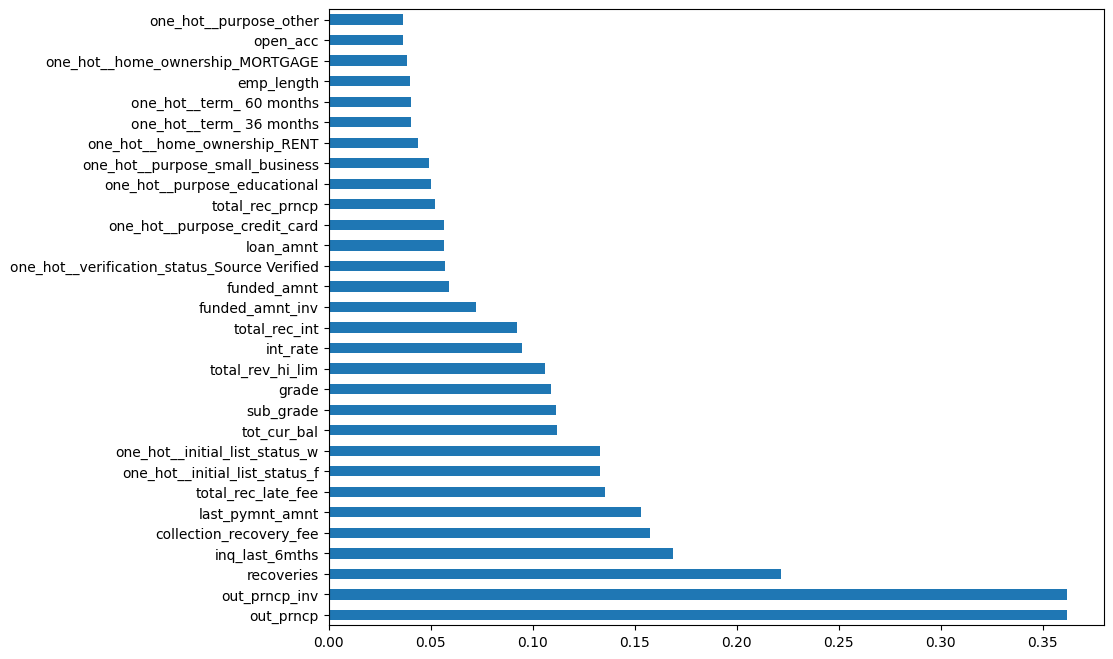

In [ ]:
corr.plot(kind='barh', figsize=(10,8))
plt.show()

In [ ]:
corr.index.tolist()

['out_prncp',
 'out_prncp_inv',
 'recoveries',
 'inq_last_6mths',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'one_hot__initial_list_status_f',
 'one_hot__initial_list_status_w',
 'tot_cur_bal',
 'sub_grade',
 'grade',
 'total_rev_hi_lim',
 'int_rate',
 'total_rec_int',
 'funded_amnt_inv',
 'funded_amnt',
 'one_hot__verification_status_Source Verified',
 'loan_amnt',
 'one_hot__purpose_credit_card',
 'total_rec_prncp',
 'one_hot__purpose_educational',
 'one_hot__purpose_small_business',
 'one_hot__home_ownership_RENT',
 'one_hot__term_ 36 months',
 'one_hot__term_ 60 months',
 'emp_length',
 'one_hot__home_ownership_MORTGAGE',
 'open_acc',
 'one_hot__purpose_other']

In [ ]:
df_corr = df_clean_train[['out_prncp', 'out_prncp_inv', 'recoveries', 'inq_last_6mths',
                          'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_late_fee',
                          'one_hot__initial_list_status_f', 'one_hot__initial_list_status_w',
                          'tot_cur_bal', 'sub_grade', 'grade', 'total_rev_hi_lim', 'int_rate',
                          'total_rec_int', 'funded_amnt_inv', 'funded_amnt', 'one_hot__verification_status_Source Verified',
                          'loan_amnt', 'one_hot__purpose_credit_card','total_rec_prncp',
                          'one_hot__purpose_educational', 'one_hot__purpose_small_business',
                          'one_hot__home_ownership_RENT', 'one_hot__term_ 36 months', 'loan_status']]

df_corr = df_corr.corr()

###Feature Correlation Heatmap

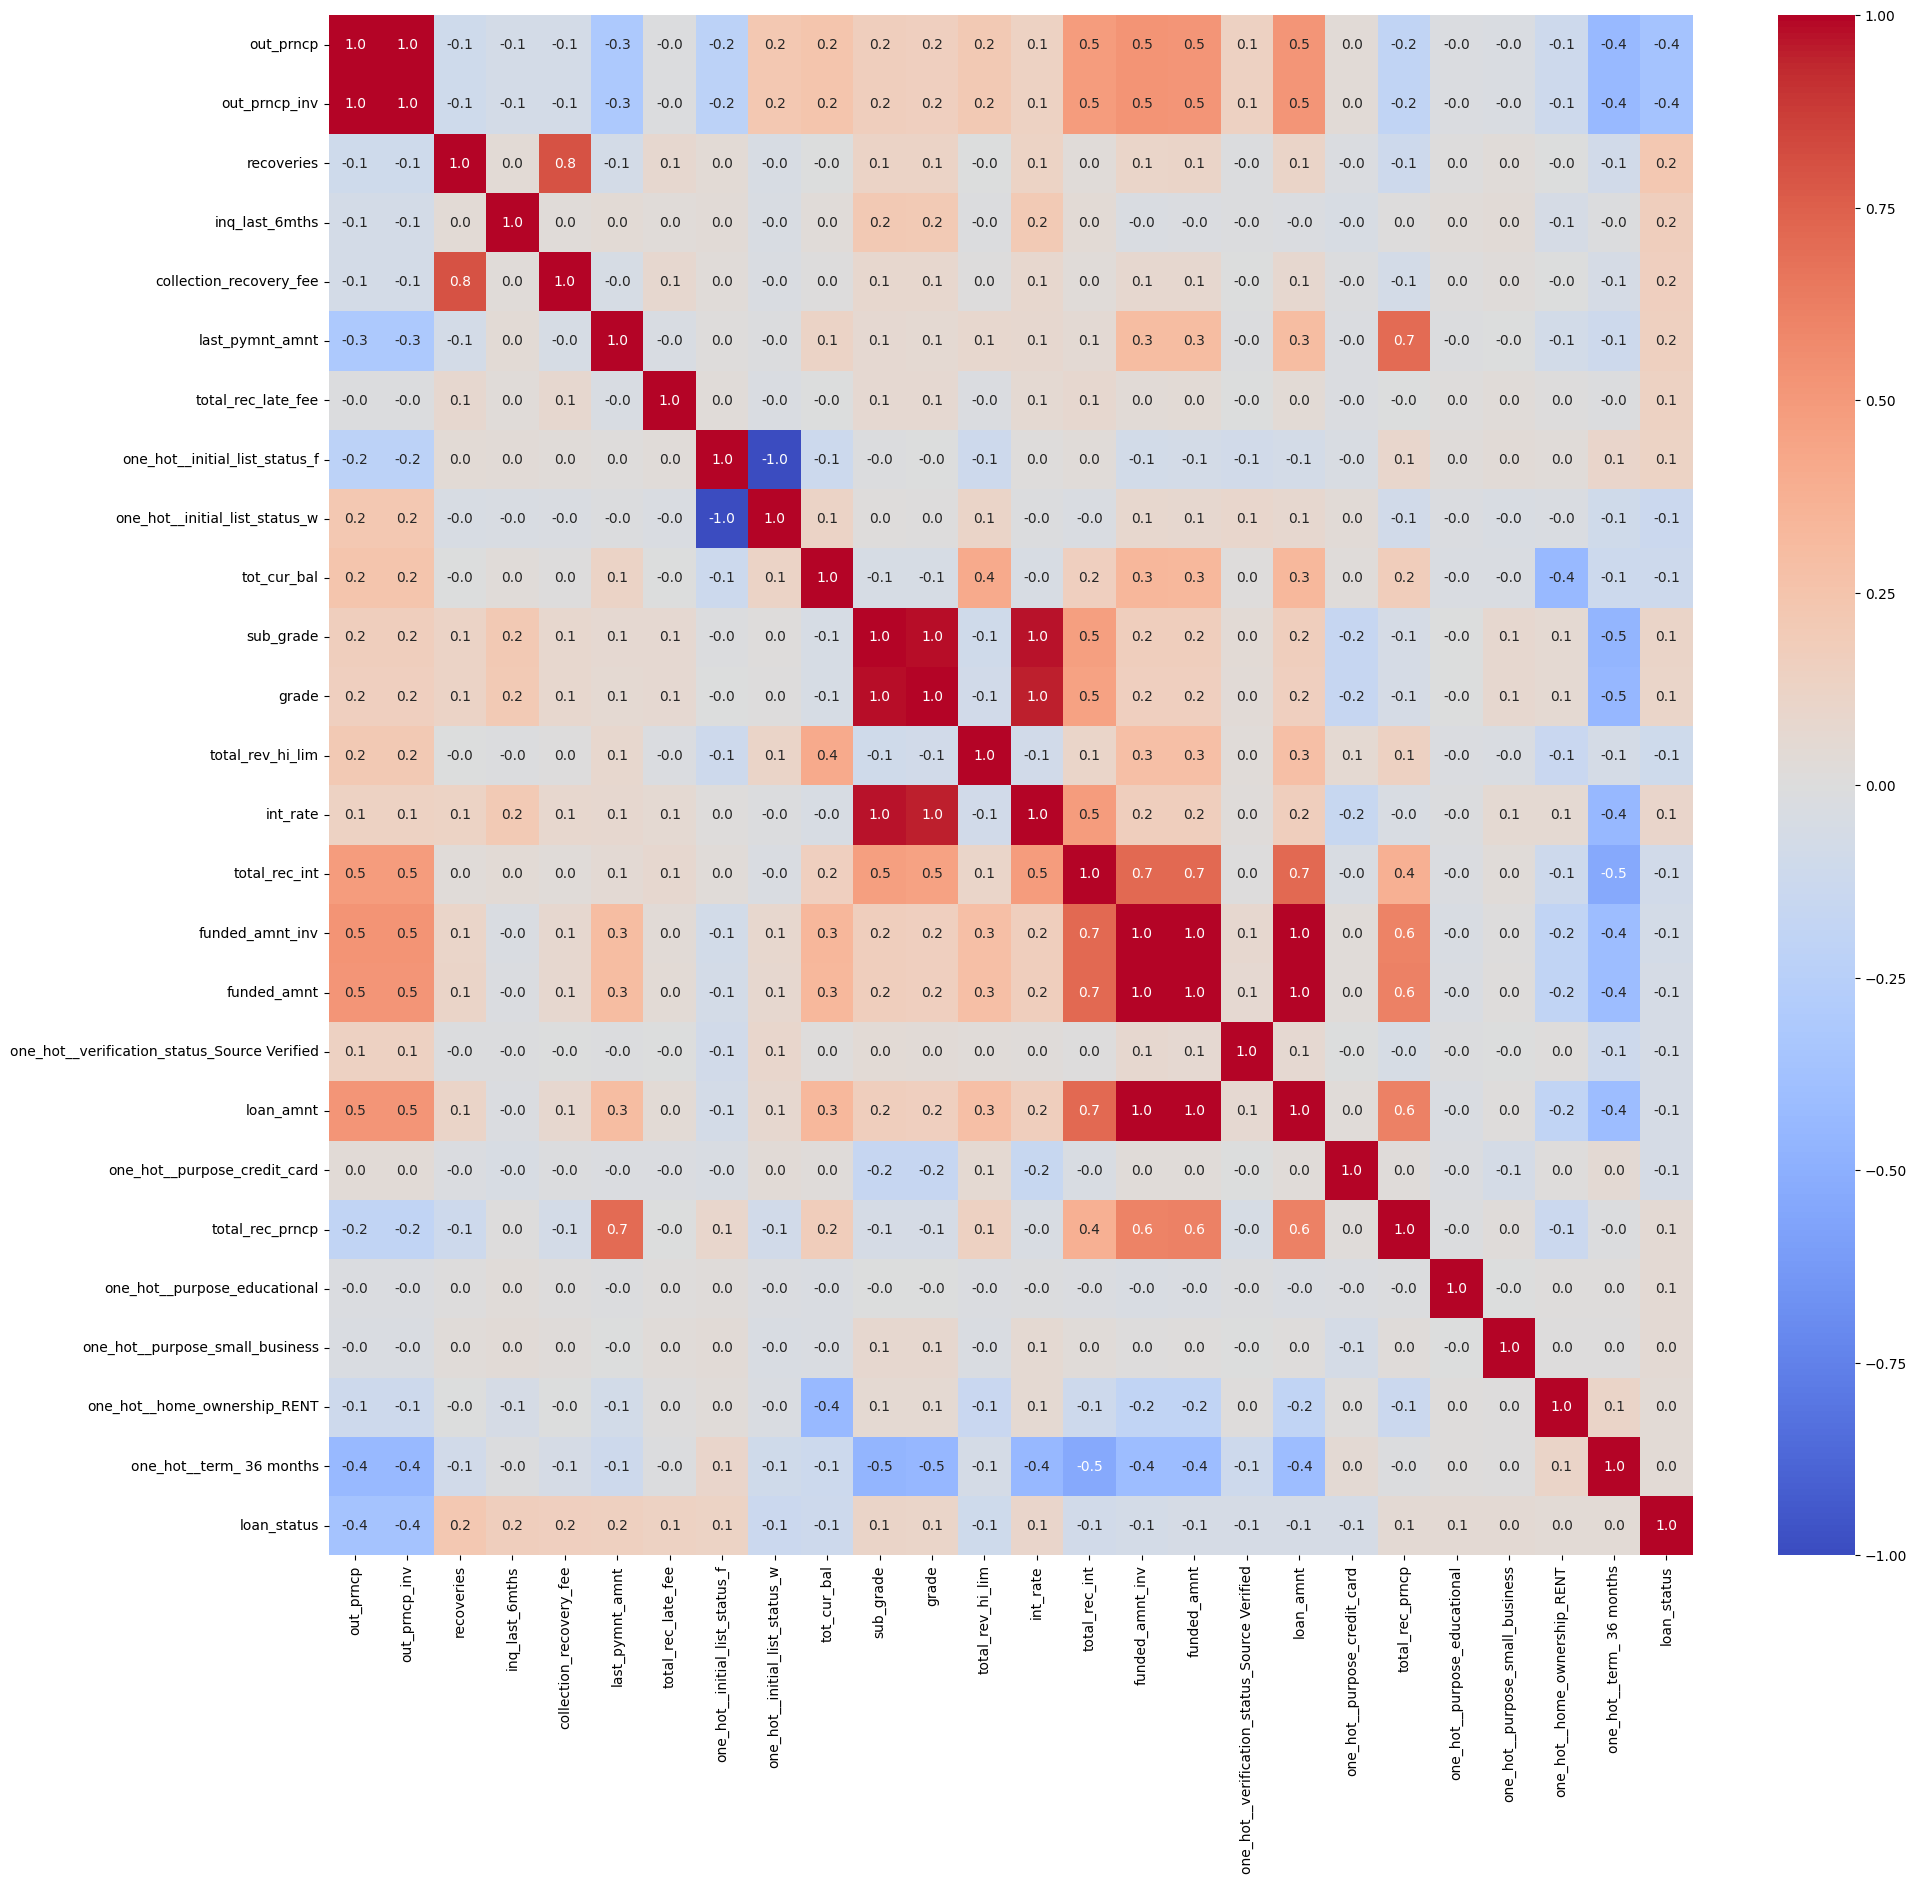

In [ ]:
plt.figure(figsize=(22,20))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

##Model Development

Feature-Target Separation

In [ ]:
x = df_clean_train.drop(['loan_status', 'out_prncp_inv'], axis=1)
y = df_clean_train['loan_status']

Splitting into Train and Validation Set

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

###Random Forest Classifier

In [ ]:
rf_pipeline = Pipeline([
                        ('rf', RandomForestClassifier())
                      ])

In [ ]:
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [ ]:
y_rf_pred = rf_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for Random Forest

In [ ]:
CR_rf = classification_report(y_validate, y_rf_pred, output_dict=True)
CR_rf = pd.DataFrame(CR_rf)
CR_rf

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.952046,0.994212,0.994956,0.751938,0.0,0.897059,0.0,0.0,0.953488,0.972174,0.615967,0.958930
recall,0.999693,0.999256,0.986179,0.088182,0.0,0.757764,0.0,0.0,0.666667,0.972174,0.499749,0.972174
f1-score,0.975288,0.996728,0.990548,0.157852,0.0,0.821549,0.0,0.0,0.784689,0.972174,0.525184,0.961335
support,35866.000000,29567.000000,6801.000000,1100.000000,499.0,322.000000,196.0,132.0,123.000000,0.972174,74606.000000,74606.000000


Classifcation Report Heatmap for Random Forest

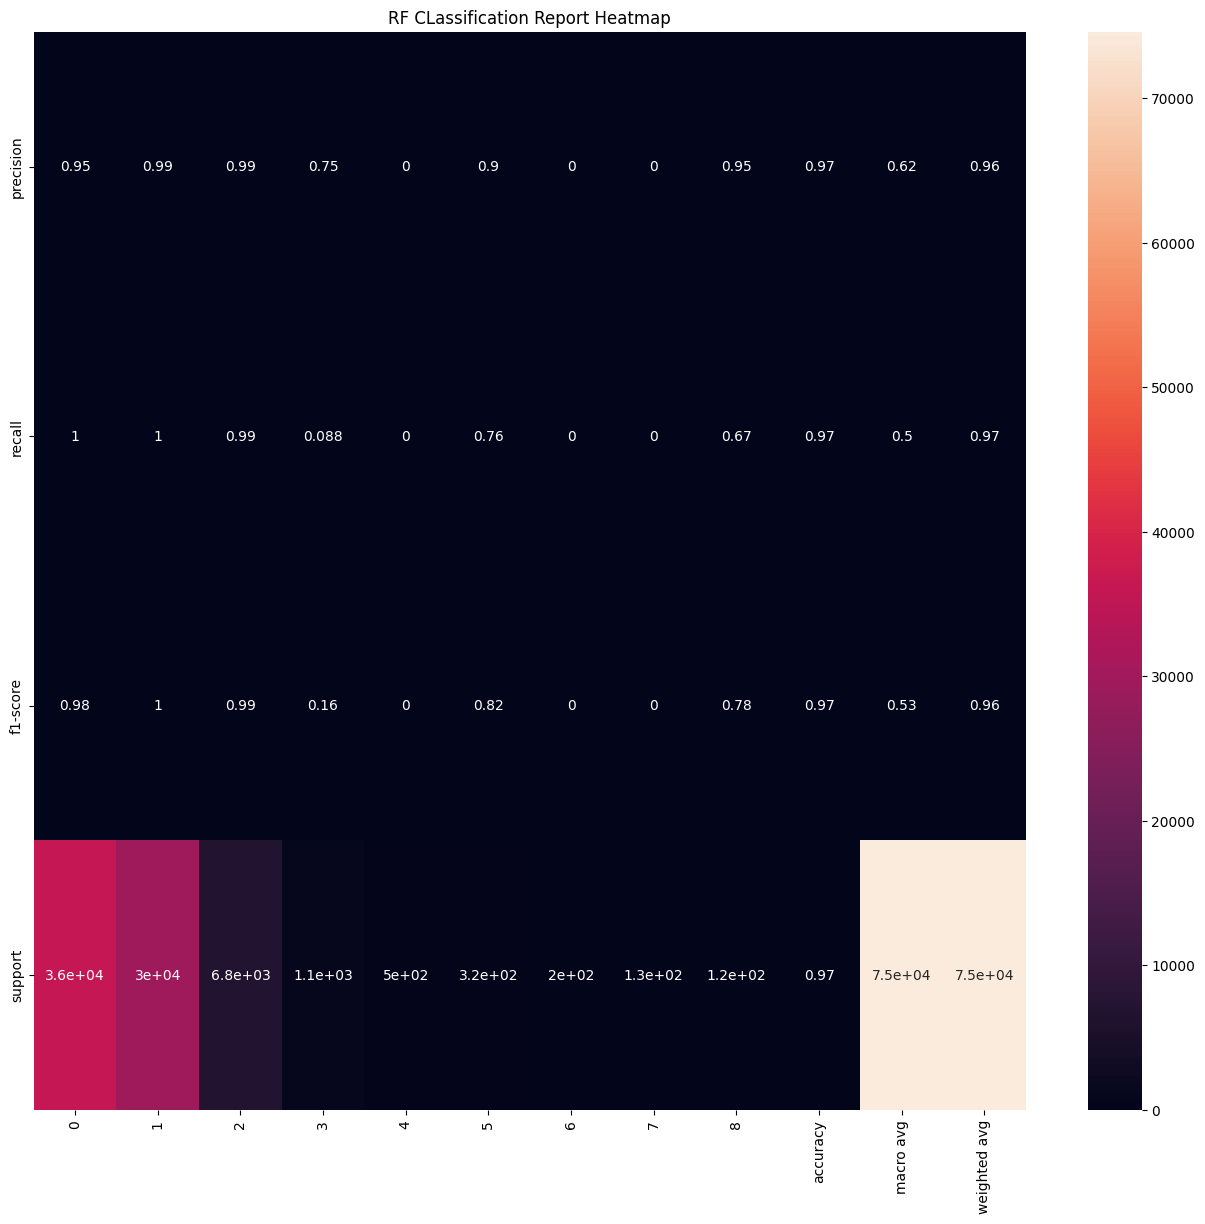

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_rf, annot=True)
plt.title('RF CLassification Report Heatmap')
plt.show()

Confusion Matrix for Random Forest

In [ ]:
CM_rf = confusion_matrix(y_validate, y_rf_pred)
CM_rf = pd.DataFrame(CM_rf)
CM_rf

,0,1,2,3,4,5,6,7,8
0,35855,2,0,9,0,0,0,0,0
1,0,29545,0,0,0,22,0,0,0
2,0,90,6707,0,0,0,0,0,4
3,1003,0,0,97,0,0,0,0,0
4,497,1,0,1,0,0,0,0,0
5,0,78,0,0,0,244,0,0,0
6,196,0,0,0,0,0,0,0,0
7,110,0,0,22,0,0,0,0,0
8,0,1,34,0,0,6,0,0,82


Confusion Matrix Heatmap for Random Forest

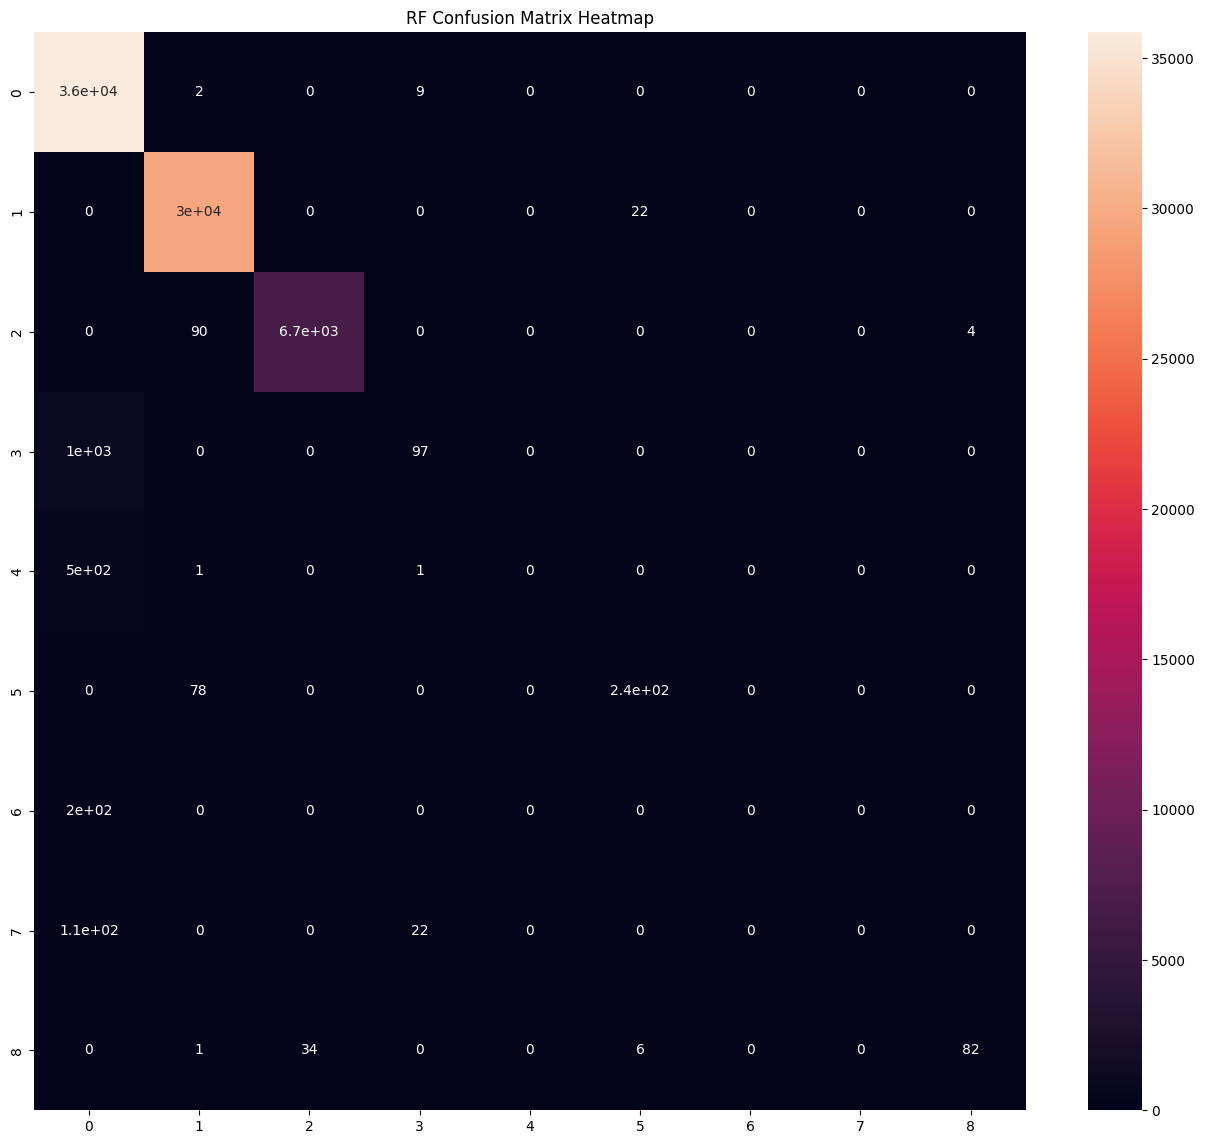

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_rf, annot=True)
plt.title('RF Confusion Matrix Heatmap')
plt.show()

###XGBoost Classifier

In [ ]:
xgb_pipeline = Pipeline([
                        ('xgb', XGBClassifier())
                        ])

In [ ]:
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_xgb_pred = xgb_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for XGBoost

In [ ]:
CR_xgb = classification_report(y_validate, y_xgb_pred, output_dict=True)
CR_xgb = pd.DataFrame(CR_xgb)
CR_xgb

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.955039,0.994276,0.997045,0.658451,0.111111,0.885350,0.0,0.375000,0.933962,0.97279,0.656693,0.96053
recall,0.996152,0.998816,0.992207,0.170000,0.002004,0.863354,0.0,0.022727,0.804878,0.97279,0.538904,0.97279
f1-score,0.975162,0.996541,0.994620,0.270231,0.003937,0.874214,0.0,0.042857,0.864629,0.97279,0.558021,0.96369
support,35866.000000,29567.000000,6801.000000,1100.000000,499.000000,322.000000,196.0,132.000000,123.000000,0.97279,74606.000000,74606.00000



Classifcation Report Heatmap for XGBoost

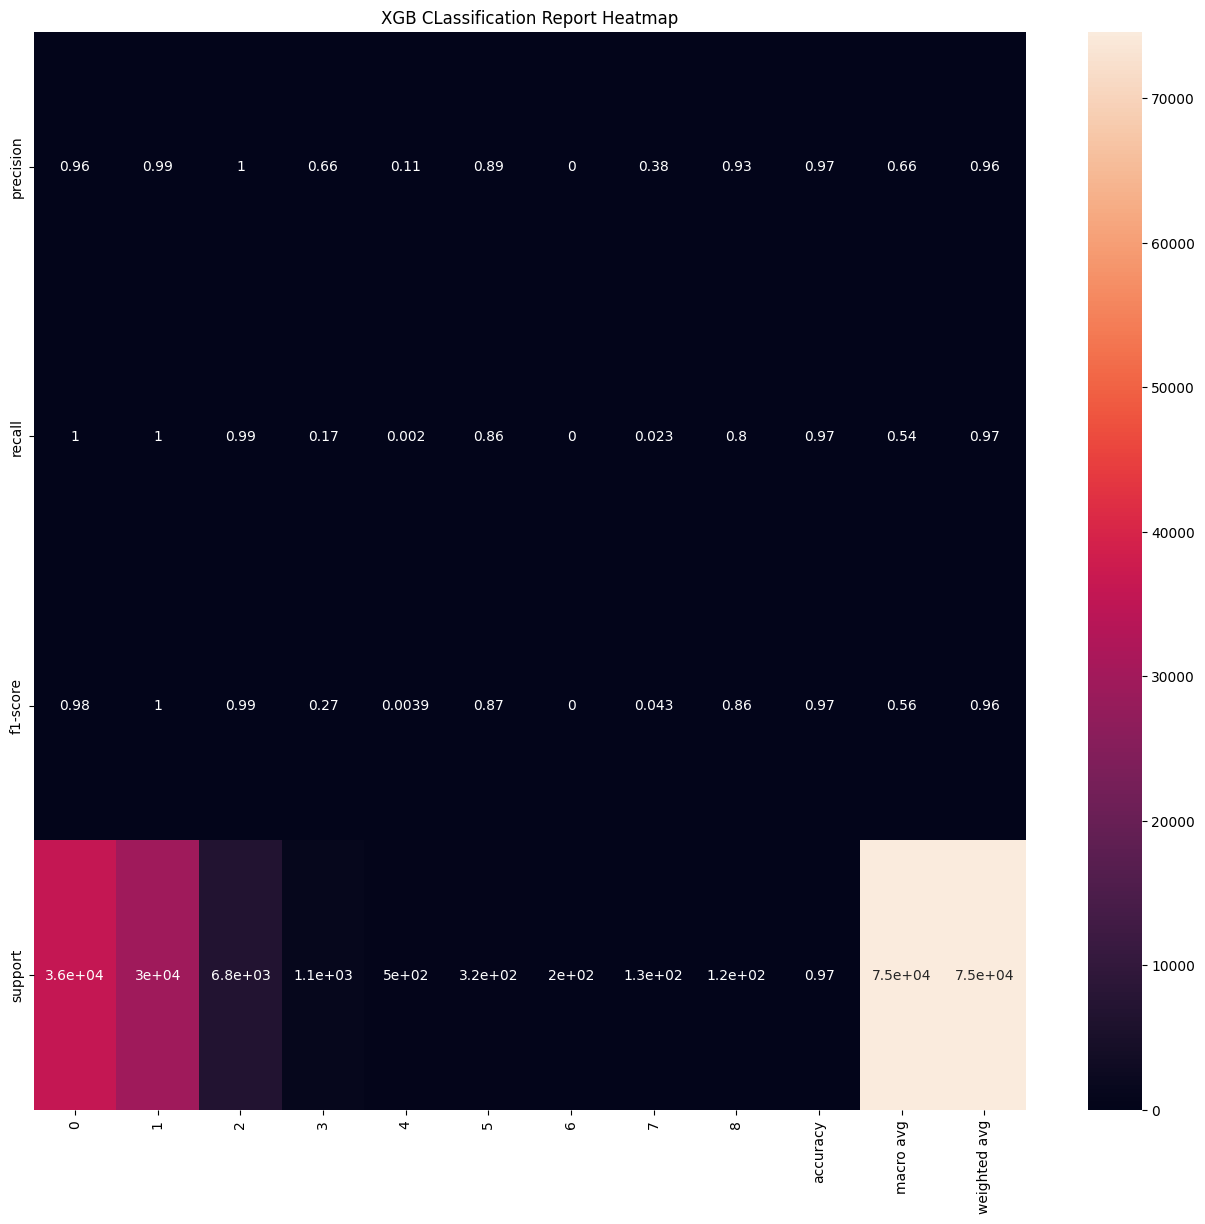

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_xgb, annot=True)
plt.title('XGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for XGBoost

In [ ]:
CM_xgb = confusion_matrix(y_validate, y_xgb_pred)
CM_xgb = pd.DataFrame(CM_xgb)
CM_xgb

,0,1,2,3,4,5,6,7,8
0,35728,78,0,50,6,1,3,0,0
1,4,29532,2,0,0,29,0,0,0
2,5,42,6748,0,0,0,0,0,6
3,901,4,0,187,2,0,1,5,0
4,483,2,0,12,1,0,1,0,0
5,0,43,0,0,0,278,0,0,1
6,192,1,0,3,0,0,0,0,0
7,97,0,0,32,0,0,0,3,0
8,0,0,18,0,0,6,0,0,99


Confusion Matrix Heatmap for XGBoost

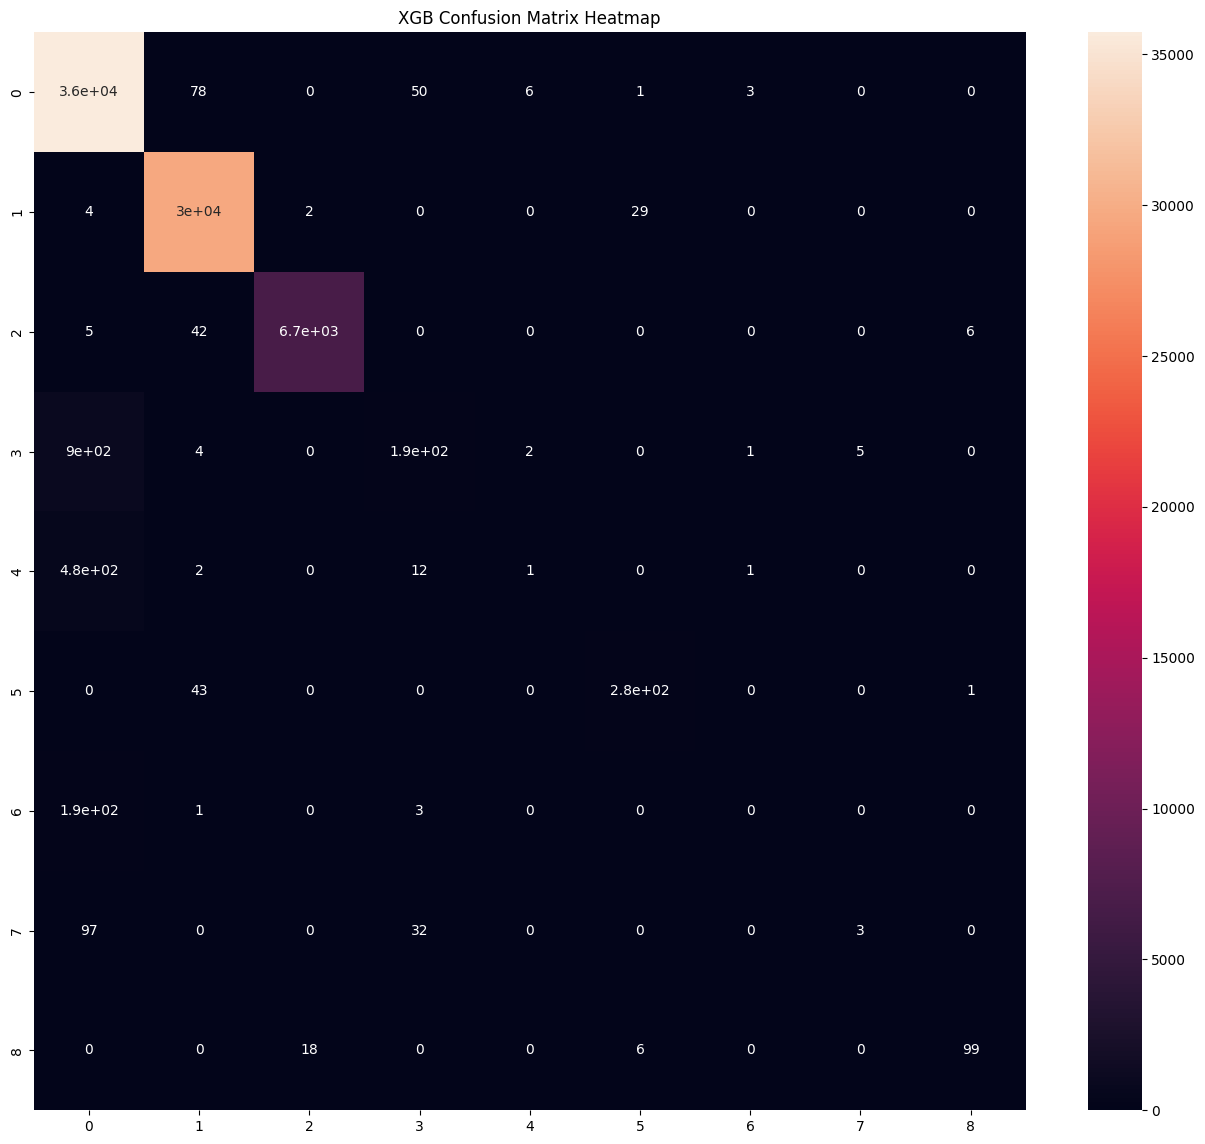

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_xgb, annot=True)
plt.title('XGB Confusion Matrix Heatmap')
plt.show()

###Hist Gradient Boosting Classifier

In [ ]:
hgb_pipeline = Pipeline([
                        ('hgb', HistGradientBoostingClassifier())
                        ])

In [ ]:
hgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('hgb', HistGradientBoostingClassifier())])

In [ ]:
y_hgb_pred = hgb_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for Hist Gradient

In [ ]:
CR_hgb = classification_report(y_validate, y_hgb_pred, output_dict=True)
CR_hgb = pd.DataFrame(CR_hgb)
CR_hgb

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.954633,0.993438,0.993834,0.526066,0.142857,0.606838,0.008403,0.040816,0.217857,0.964199,0.498305,0.955018
recall,0.991524,0.993270,0.971622,0.100909,0.010020,0.661491,0.005102,0.045455,0.495935,0.964199,0.475036,0.964199
f1-score,0.972729,0.993354,0.982602,0.169336,0.018727,0.632987,0.006349,0.043011,0.302730,0.964199,0.457980,0.956822
support,35866.000000,29567.000000,6801.000000,1100.000000,499.000000,322.000000,196.000000,132.000000,123.000000,0.964199,74606.000000,74606.000000


Classifcation Report Heatmap for Hist Gradient

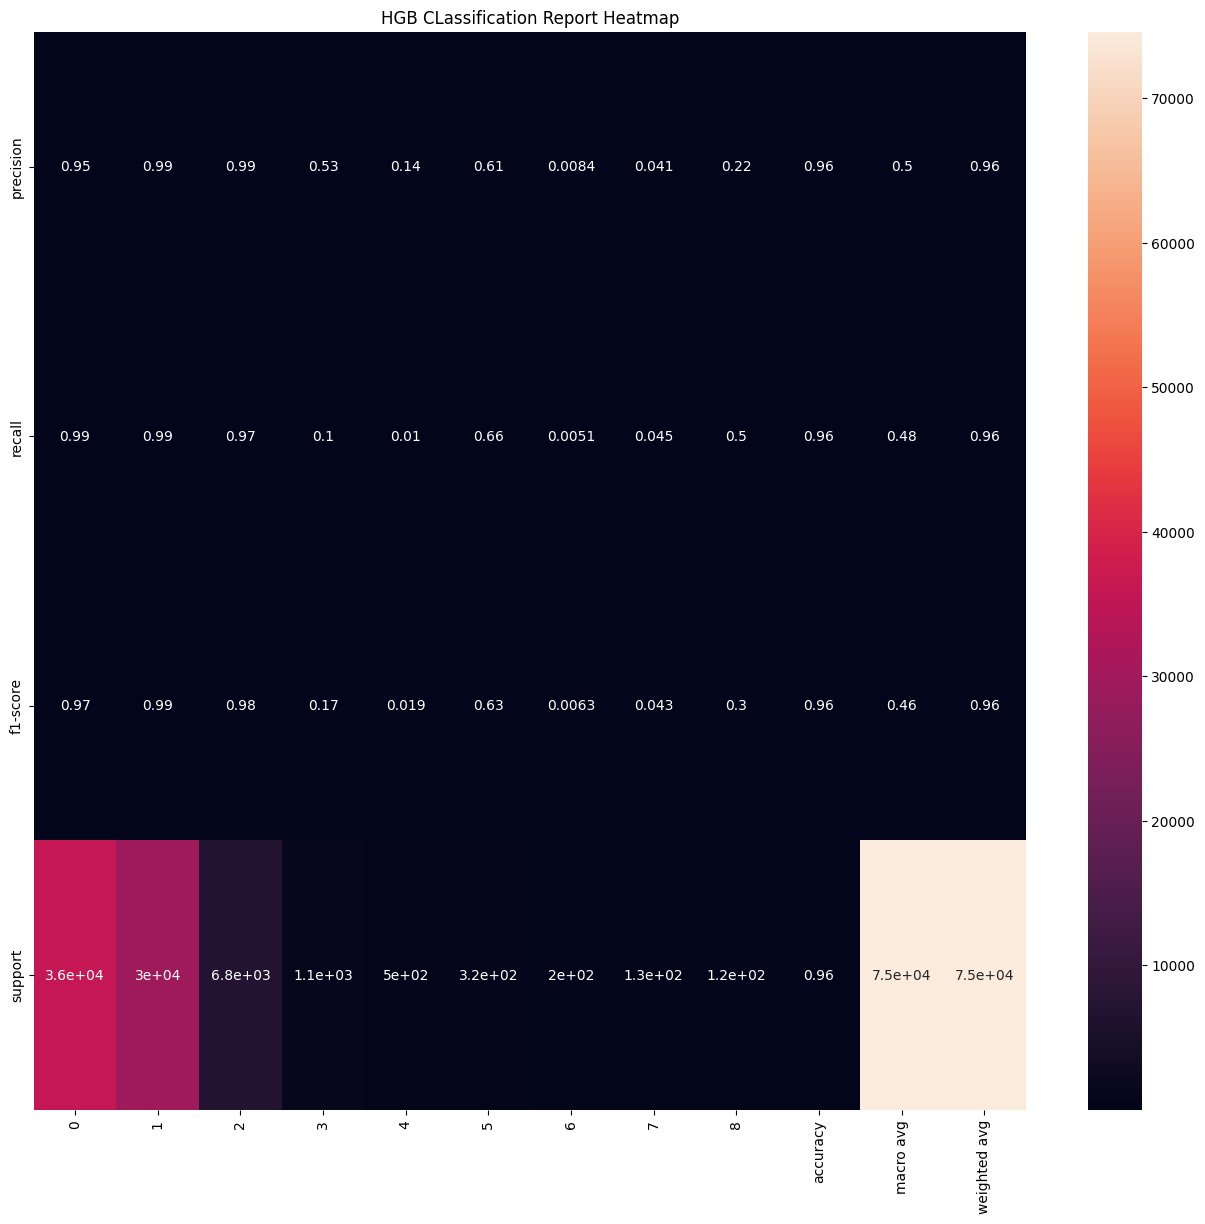

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_hgb, annot=True)
plt.title('HGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for Hist Gradient

In [ ]:
CM_hgb = confusion_matrix(y_validate, y_hgb_pred)
CM_hgb = pd.DataFrame(CM_hgb)
CM_hgb

,0,1,2,3,4,5,6,7,8
0,35562,2,0,71,13,14,94,76,34
1,1,29368,4,0,2,93,2,6,91
2,0,109,6608,0,1,8,0,9,66
3,918,0,0,111,10,1,15,43,2
4,476,1,0,8,5,0,5,4,0
5,2,77,3,0,0,213,0,1,26
6,191,0,0,1,2,0,1,1,0
7,102,0,0,20,2,0,2,6,0
8,0,5,34,0,0,22,0,1,61


Confusion Matrix Heatmap for Hist Gradient

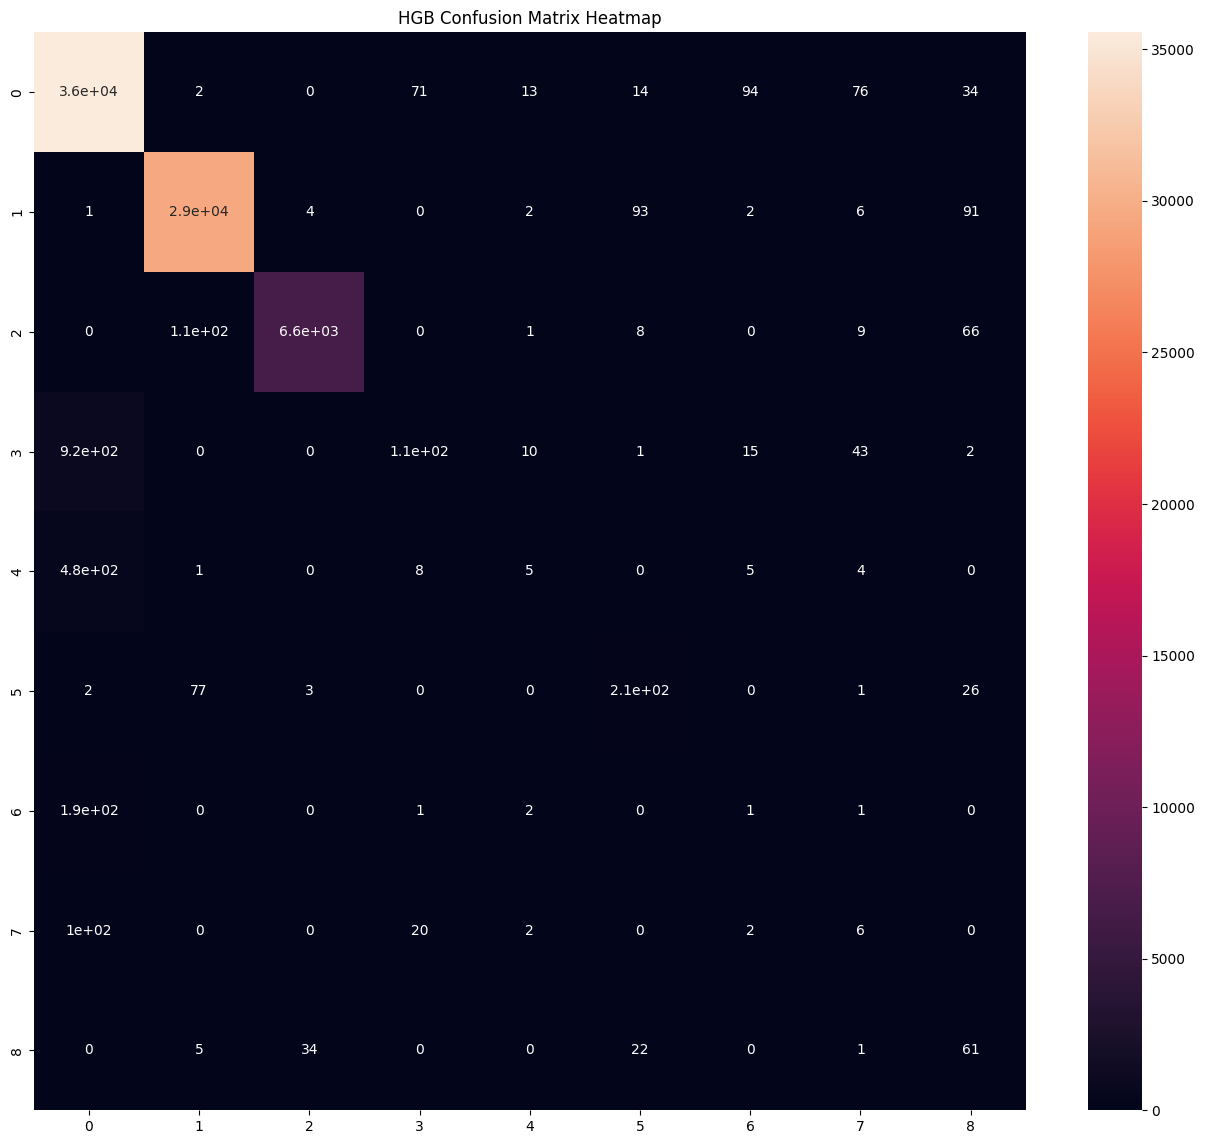

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_hgb, annot=True)
plt.title('HGB Confusion Matrix Heatmap')
plt.show()

###LightGBM Classifier

In [ ]:
lgb_pipeline = Pipeline([
                        ('lgb', LGBMClassifier())
                        ])

In [ ]:
lgb_pipeline.fit(x_train, y_train_merge)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 288937, number of negative: 9485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5625
[LightGBM] [Info] Number of data points in the train set: 298422, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.968216 -> initscore=3.416497
[LightGBM] [Info] Start training from score 3.416497


Pipeline(steps=[('lgb', LGBMClassifier())])

In [ ]:
y_lgb_pred = lgb_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for LightGBM

In [ ]:
CR_lgb = classification_report(y_validate, y_lgb_pred, output_dict=True)
CR_lgb = pd.DataFrame(CR_lgb)
CR_lgb

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.097765,0.399689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396791,0.055273,0.205400
recall,0.001952,0.998850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396791,0.111200,0.396791
f1-score,0.003827,0.570923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396791,0.063861,0.228102
support,35866.000000,29567.000000,6801.0,1100.0,499.0,322.0,196.0,132.0,123.0,0.396791,74606.000000,74606.000000


Classifcation Report Heatmap for LightGBM

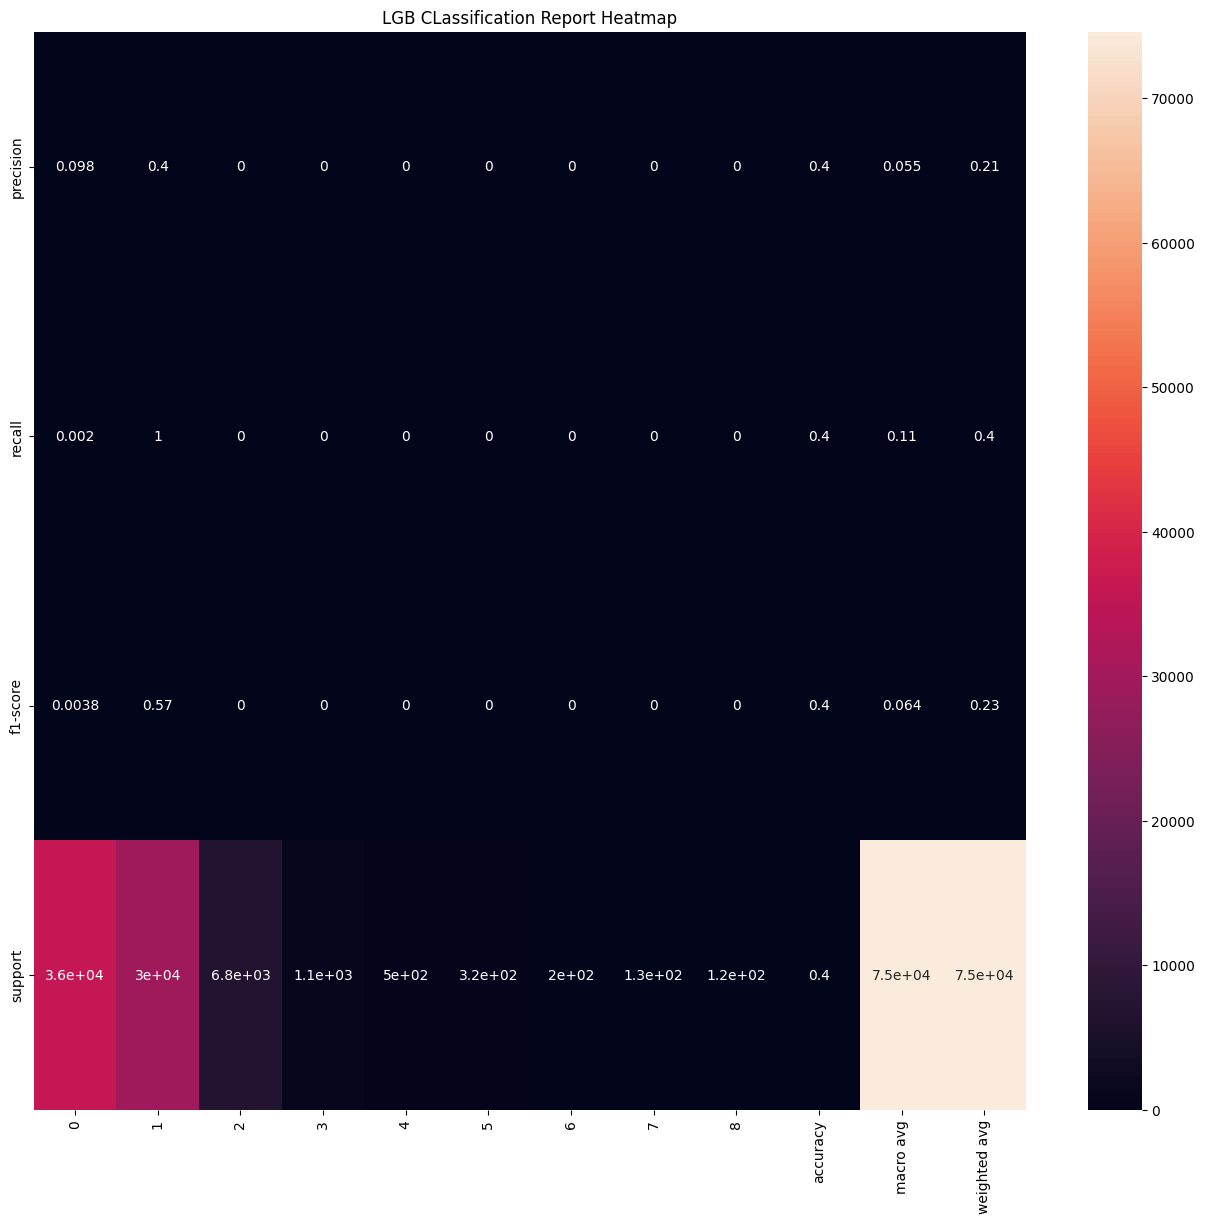

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_lgb, annot=True)
plt.title('LGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for LightGBM

In [ ]:
CM_lgb = confusion_matrix(y_validate, y_lgb_pred)
CM_lgb = pd.DataFrame(CM_lgb)
CM_lgb

,0,1,2,3,4,5,6,7,8
0,70,35796,0,0,0,0,0,0,0
1,34,29533,0,0,0,0,0,0,0
2,7,6794,0,0,0,0,0,0,0
3,178,922,0,0,0,0,0,0,0
4,20,479,0,0,0,0,0,0,0
5,262,60,0,0,0,0,0,0,0
6,4,192,0,0,0,0,0,0,0
7,29,103,0,0,0,0,0,0,0
8,112,11,0,0,0,0,0,0,0


Confusion Matrix Heatmap for LightGBM

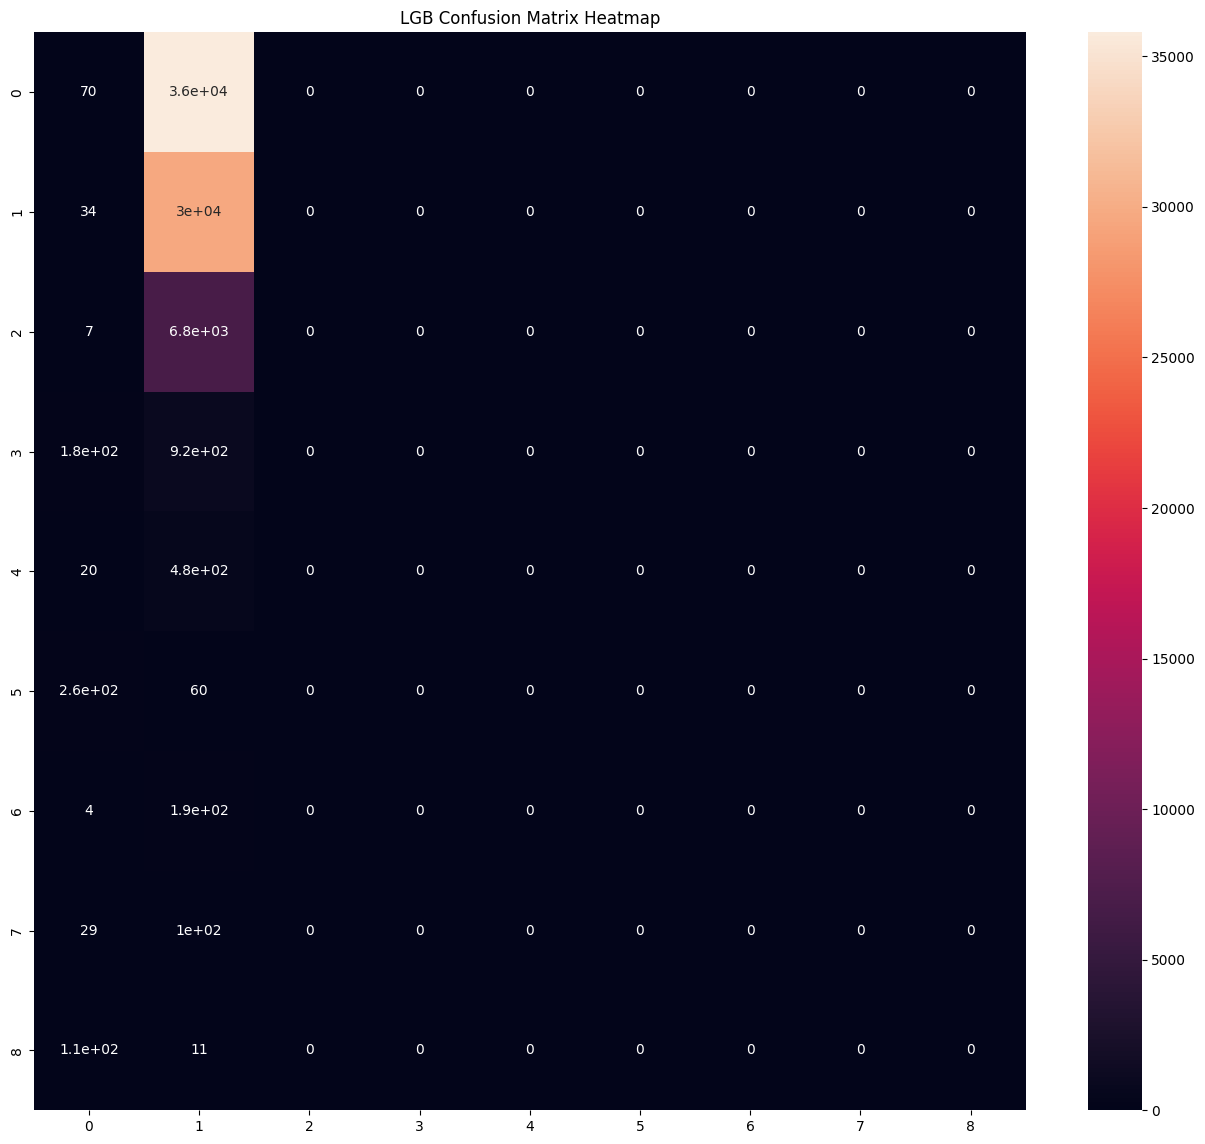

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_lgb, annot=True)
plt.title('LGB Confusion Matrix Heatmap')
plt.show()

##Model Optimization

###Random Forest Classifier

In [ ]:
rf_pipeline = Pipeline([
                        ('rf', RandomForestClassifier(n_estimators=700, class_weight='balanced_subsample',
                                                     max_depth=None, n_jobs=-1, min_samples_leaf=1,
                                                      random_state=42))
                      ])

In [ ]:
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=700, n_jobs=-1,
                                        random_state=42))])

In [ ]:
y_rf_pred = rf_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for Random Forest

In [ ]:
CR_rf = classification_report(y_validate, y_rf_pred, output_dict=True)
CR_rf = pd.DataFrame(CR_rf)
CR_rf

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.949135,0.992477,0.994492,0.500000,0.0,0.932203,0.0,0.0,0.964706,0.970458,0.592557,0.953256
recall,0.999944,0.999526,0.982356,0.001818,0.0,0.683230,0.0,0.0,0.666667,0.970458,0.481505,0.970458
f1-score,0.973877,0.995989,0.988387,0.003623,0.0,0.788530,0.0,0.0,0.788462,0.970458,0.504319,0.957757
support,35866.000000,29567.000000,6801.000000,1100.000000,499.0,322.000000,196.0,132.0,123.000000,0.970458,74606.000000,74606.000000


Classifcation Report Heatmap for Random Forest

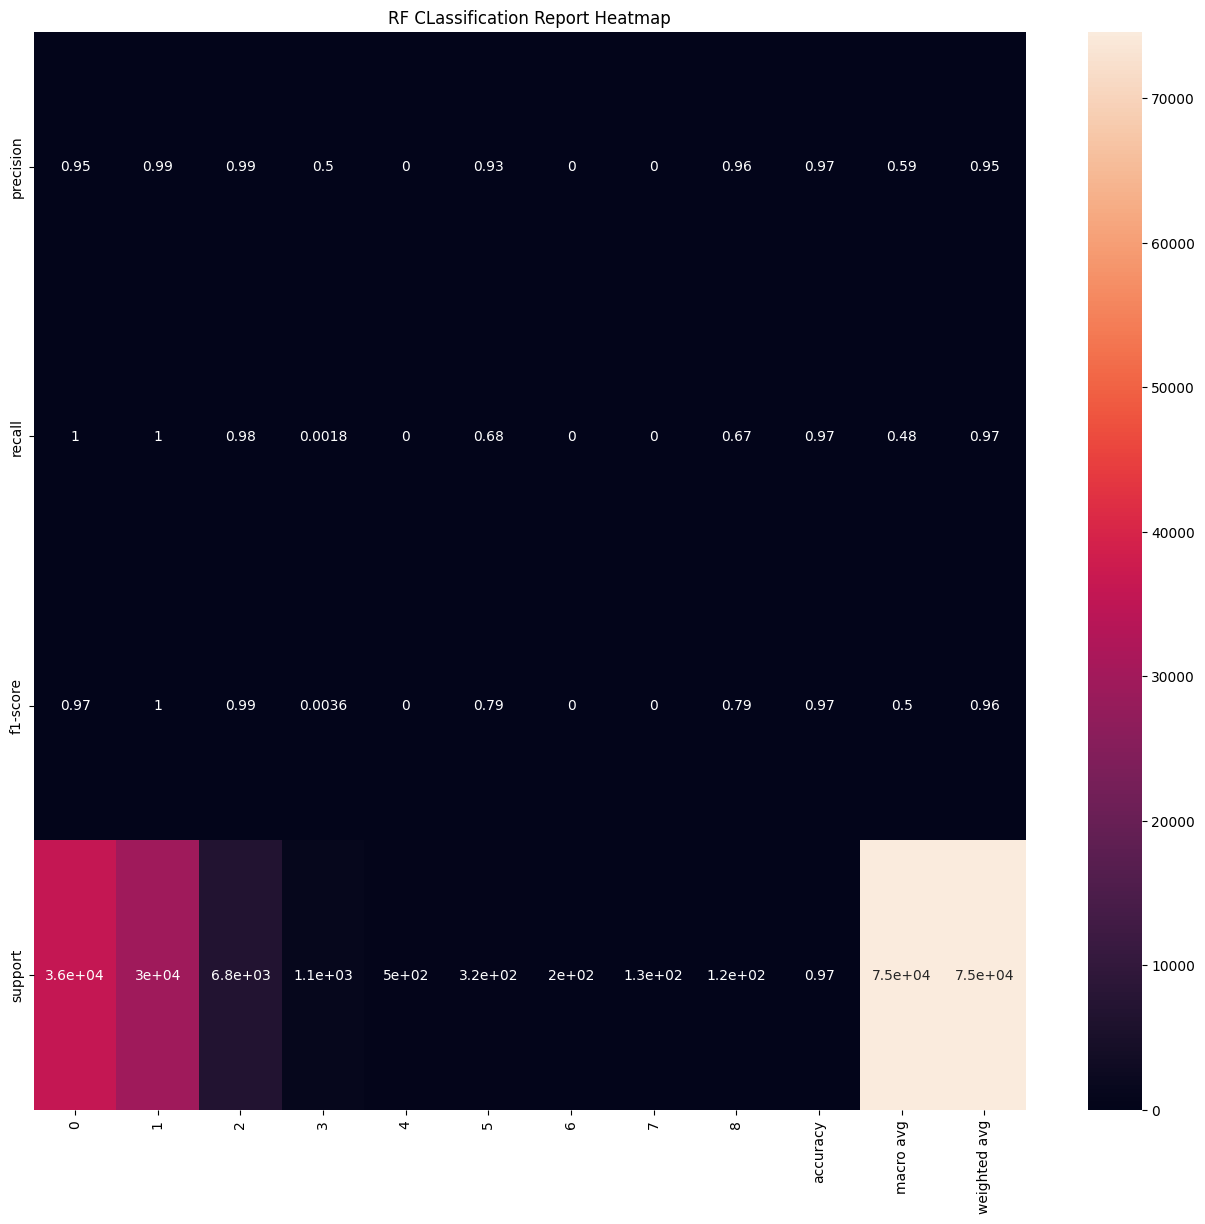

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_rf, annot=True)
plt.title('RF CLassification Report Heatmap')
plt.show()

Confusion Matrix for Random Forest

In [ ]:
CM_rf = confusion_matrix(y_validate, y_rf_pred)
CM_rf = pd.DataFrame(CM_rf)
CM_rf

,0,1,2,3,4,5,6,7,8
0,35864,2,0,0,0,0,0,0,0
1,0,29553,0,0,0,14,0,0,0
2,0,117,6681,0,0,0,0,0,3
3,1098,0,0,2,0,0,0,0,0
4,498,1,0,0,0,0,0,0,0
5,0,102,0,0,0,220,0,0,0
6,196,0,0,0,0,0,0,0,0
7,130,0,0,2,0,0,0,0,0
8,0,2,37,0,0,2,0,0,82


Confusion Matrix Heatmap for Random Forest

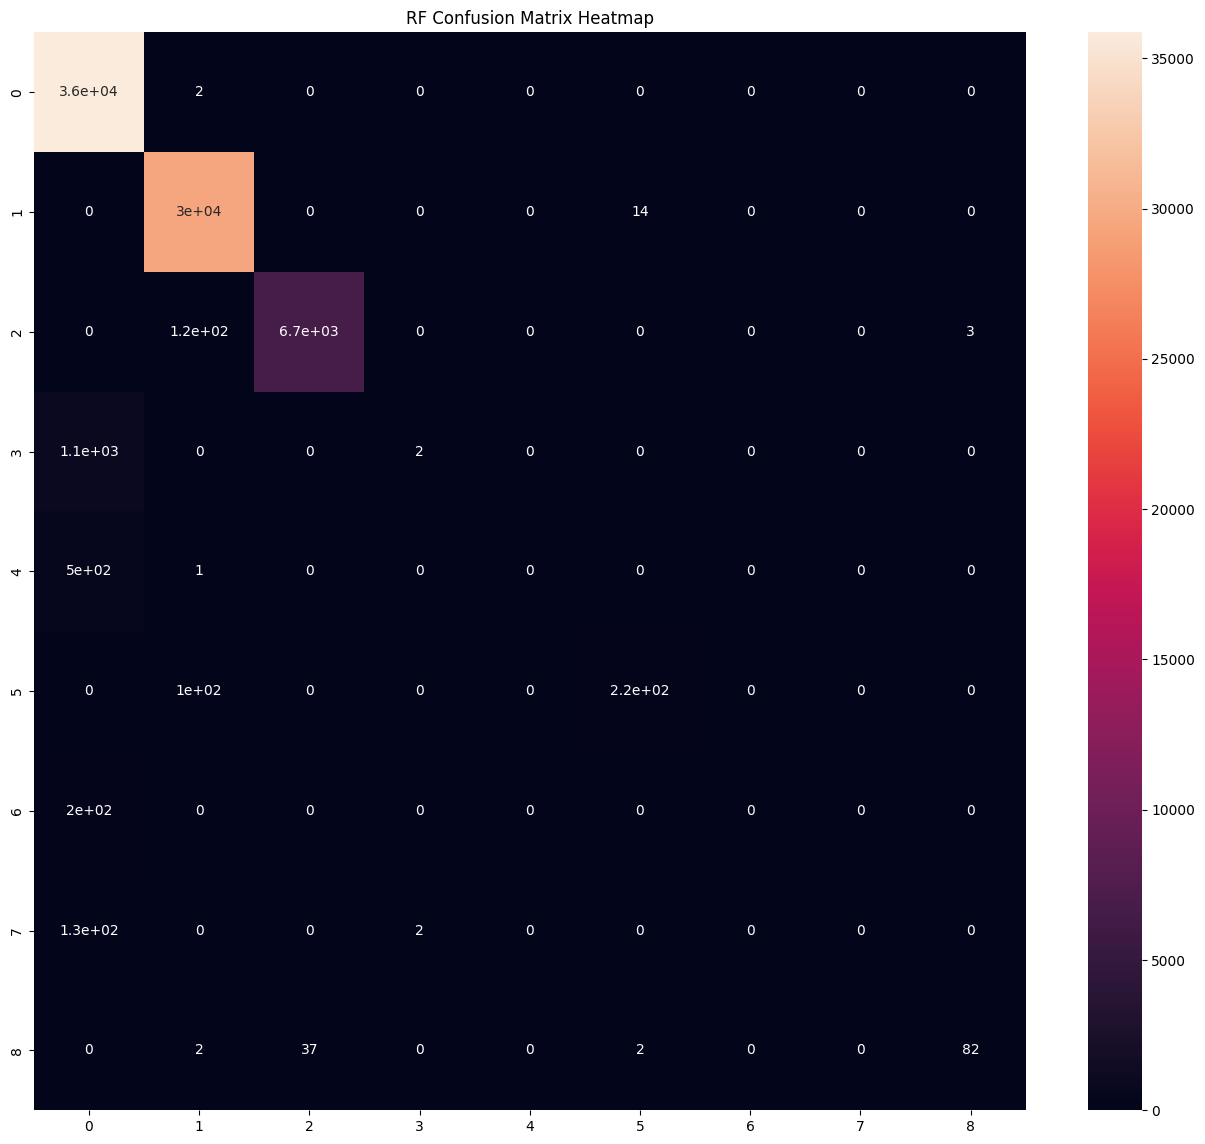

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_rf, annot=True)
plt.title('RF Confusion Matrix Heatmap')
plt.show()

###XGBoost Classifier

In [ ]:
xgb_pipeline = Pipeline([
                        ('xgb', XGBClassifier(objective='multi:softprob', n_estimators=600,
                                              max_depth=8, scale_pos_weight=1, learning_rate=0.05,
                                              eval_metric='mlogloss', random_state=42))
                        ])

In [ ]:
xgb_pipeline.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:28:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=600, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_xgb_pred = xgb_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for XGBoost

In [ ]:
CR_xgb = classification_report(y_validate, y_xgb_pred, output_dict=True)
CR_xgb = pd.DataFrame(CR_xgb)
CR_xgb

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.955136,0.994779,0.995573,0.689895,0.0,0.901899,0.0,0.500000,0.911765,0.973179,0.661005,0.960618
recall,0.996626,0.998884,0.992060,0.180000,0.0,0.885093,0.0,0.022727,0.756098,0.973179,0.536832,0.973179
f1-score,0.975440,0.996827,0.993814,0.285508,0.0,0.893417,0.0,0.043478,0.826667,0.973179,0.557239,0.964083
support,35866.000000,29567.000000,6801.000000,1100.000000,499.0,322.000000,196.0,132.000000,123.000000,0.973179,74606.000000,74606.000000


Classifcation Report Heatmap for XGBoost

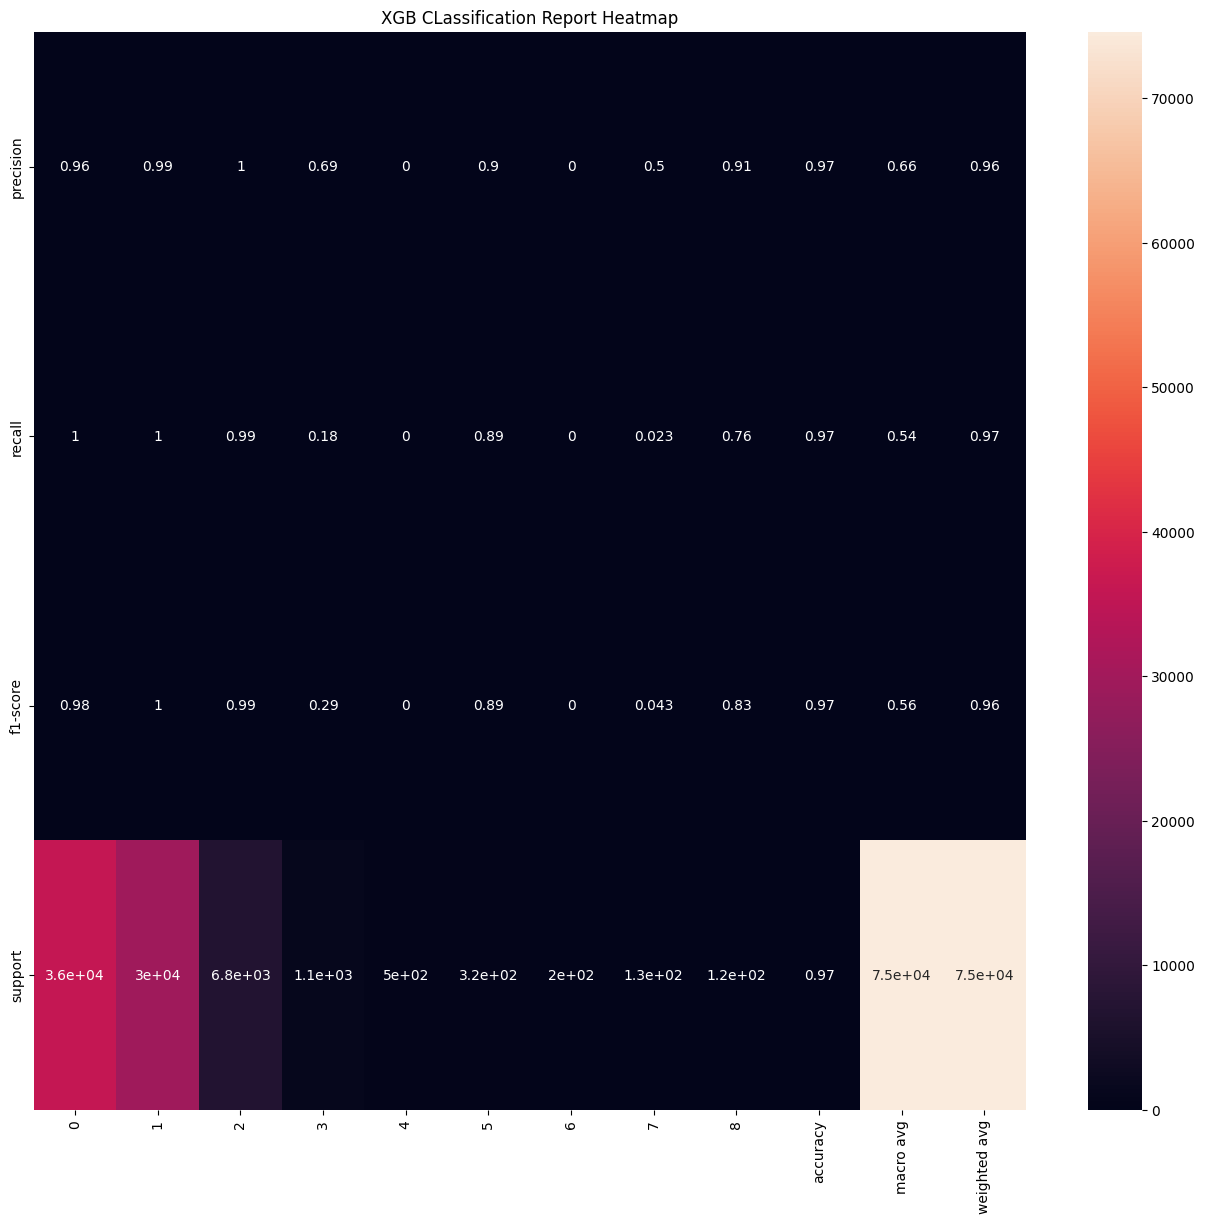

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_xgb, annot=True)
plt.title('XGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for XGBoost

In [ ]:
CM_xgb = confusion_matrix(y_validate, y_xgb_pred)
CM_xgb = pd.DataFrame(CM_xgb)
CM_xgb

,0,1,2,3,4,5,6,7,8
0,35745,70,1,46,2,1,1,0,0
1,4,29534,3,0,0,26,0,0,0
2,4,42,6747,0,0,0,0,0,8
3,893,4,0,198,2,0,0,3,0
4,491,2,0,6,0,0,0,0,0
5,0,36,0,0,0,285,0,0,1
6,192,1,0,3,0,0,0,0,0
7,95,0,0,34,0,0,0,3,0
8,0,0,26,0,0,4,0,0,93


Confusion Matrix Heatmap for XGBoost

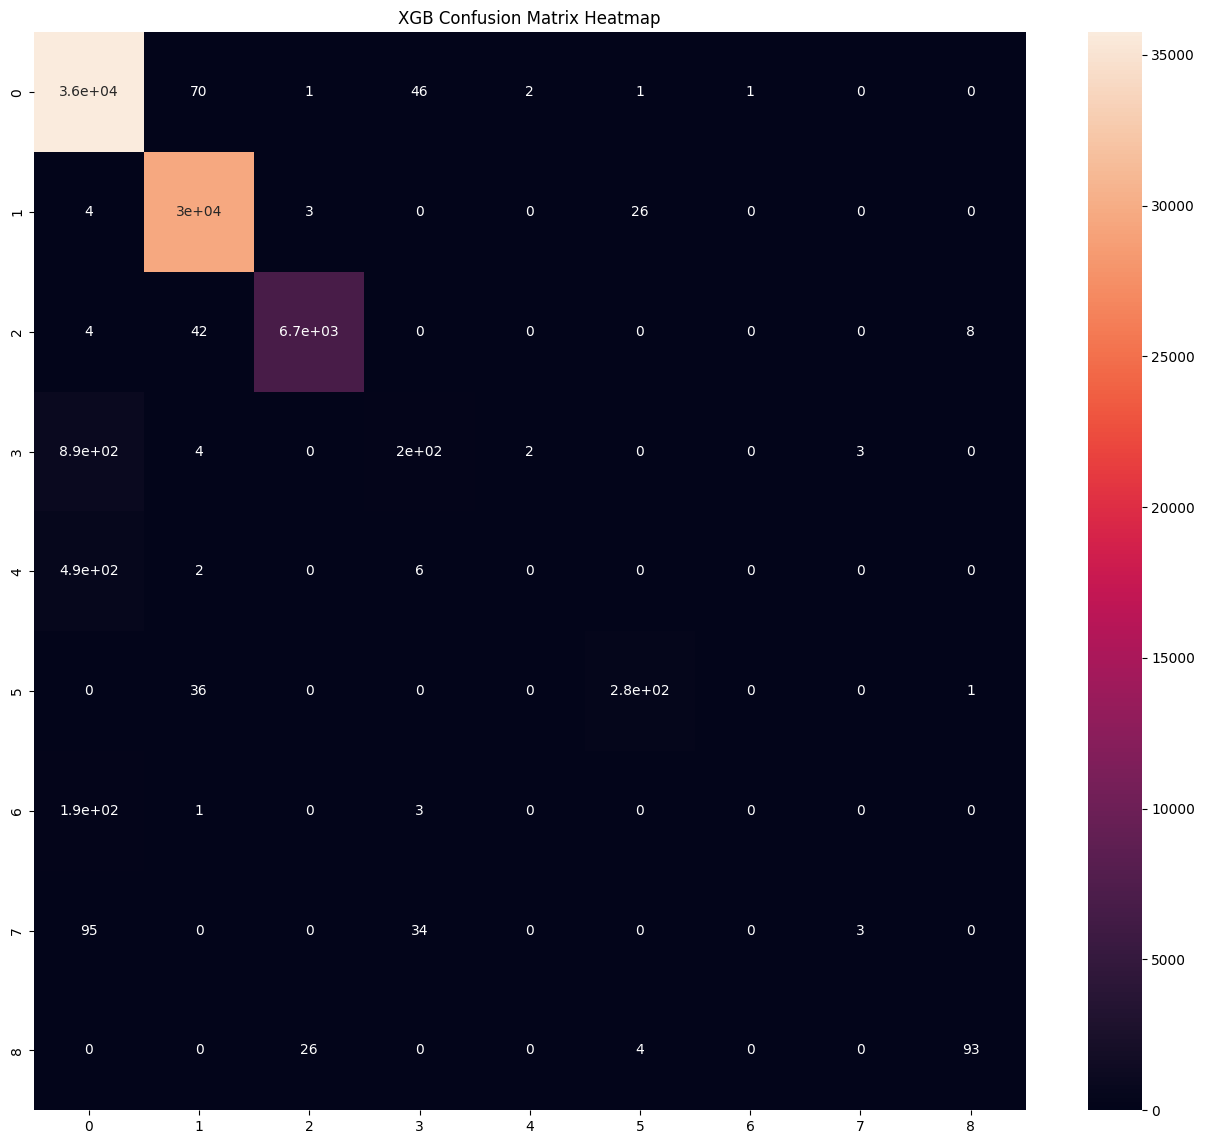

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_xgb, annot=True)
plt.title('XGB Confusion Matrix Heatmap')
plt.show()

###Hist Gradient Boosting Classifier

In [ ]:
hgb_pipeline = Pipeline([
                        ('hgb', HistGradientBoostingClassifier(max_iter=300, learning_rate=0.05,
                                                               class_weight='balanced', max_depth=8))
                        ])

In [ ]:
hgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('hgb',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                learning_rate=0.05, max_depth=8,
                                                max_iter=300))])

In [ ]:
y_hgb_pred = hgb_pipeline.predict(x_validate)

###Model Evaluation

Classification Report for Hist Gradient

In [ ]:
CR_hgb = classification_report(y_validate, y_hgb_pred, output_dict=True)
CR_hgb = pd.DataFrame(CR_hgb)
CR_hgb

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.975227,0.997339,0.997911,0.096603,0.020840,0.481707,0.008696,0.013481,0.774648,0.795968,0.485161,0.960019
recall,0.627837,0.988873,0.983385,0.297273,0.270541,0.981366,0.122449,0.212121,0.894309,0.795968,0.597573,0.795968
f1-score,0.763892,0.993088,0.990595,0.145819,0.038699,0.646217,0.016238,0.025351,0.830189,0.795968,0.494454,0.857757
support,35866.000000,29567.000000,6801.000000,1100.000000,499.000000,322.000000,196.000000,132.000000,123.000000,0.795968,74606.000000,74606.000000


Classifcation Report Heatmap for Hist Gradient

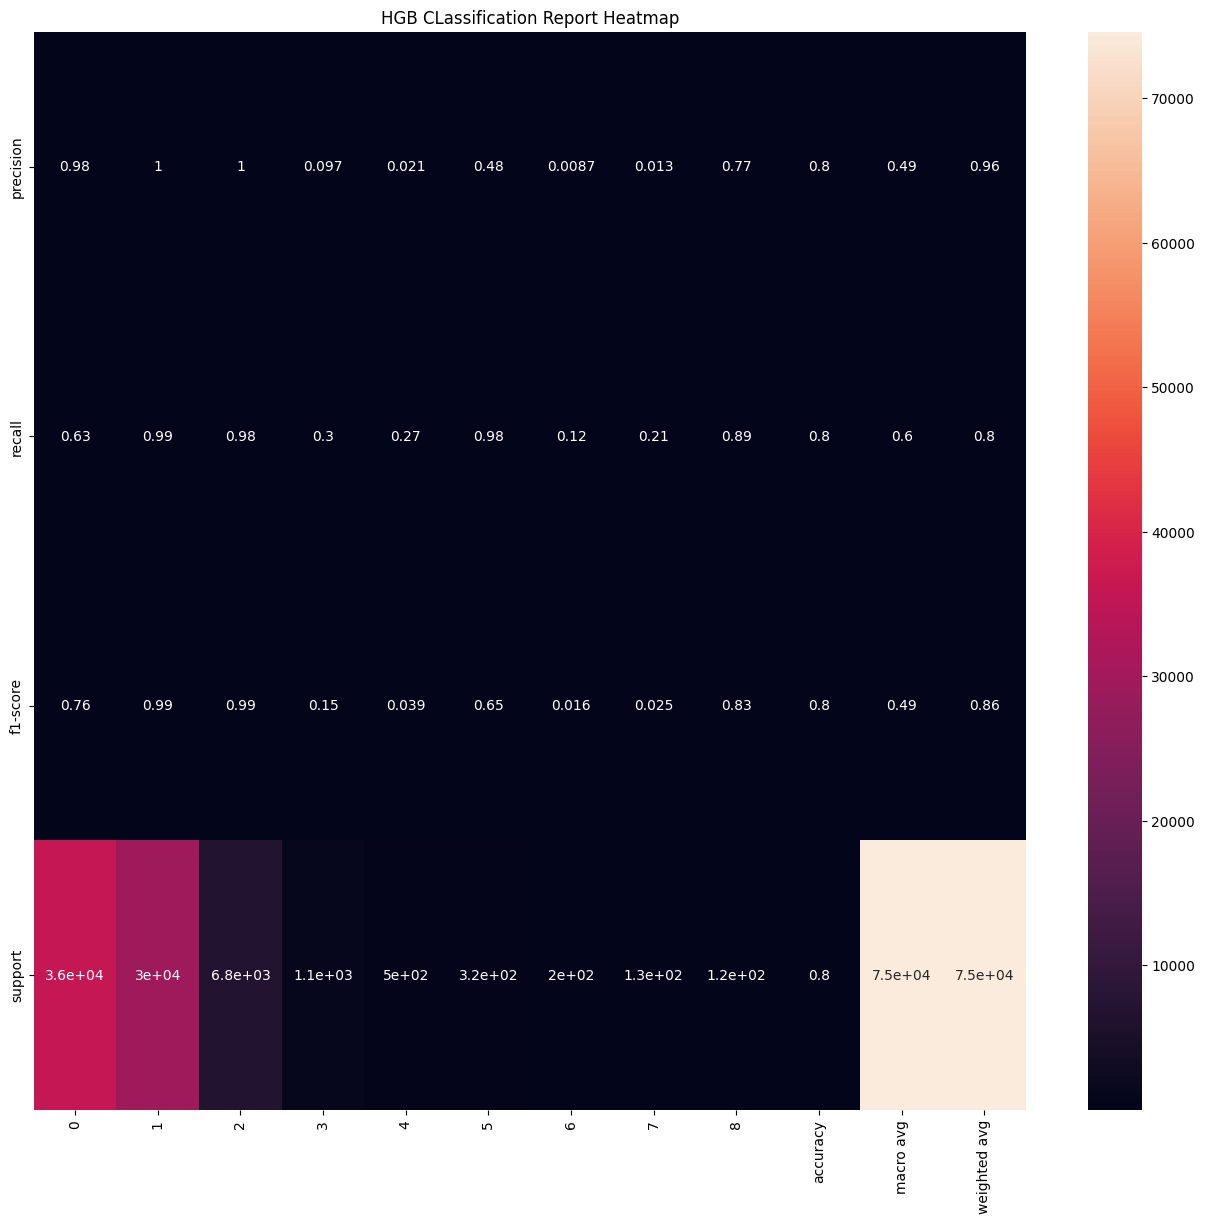

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_hgb, annot=True)
plt.title('HGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for Hist Gradient

In [ ]:
CM_hgb = confusion_matrix(y_validate, y_hgb_pred)
CM_hgb = pd.DataFrame(CM_hgb)
CM_hgb

,0,1,2,3,4,5,6,7,8
0,22518,2,0,2888,6071,0,2569,1818,0
1,0,29238,5,0,0,324,0,0,0
2,0,69,6688,0,0,12,0,0,32
3,287,0,0,327,201,0,95,190,0
4,188,1,0,96,135,0,52,27,0
5,0,6,0,0,0,316,0,0,0
6,65,0,0,40,53,0,24,14,0
7,32,0,0,34,18,0,20,28,0
8,0,0,9,0,0,4,0,0,110


Confusion Matrix Heatmap for Hist Gradient

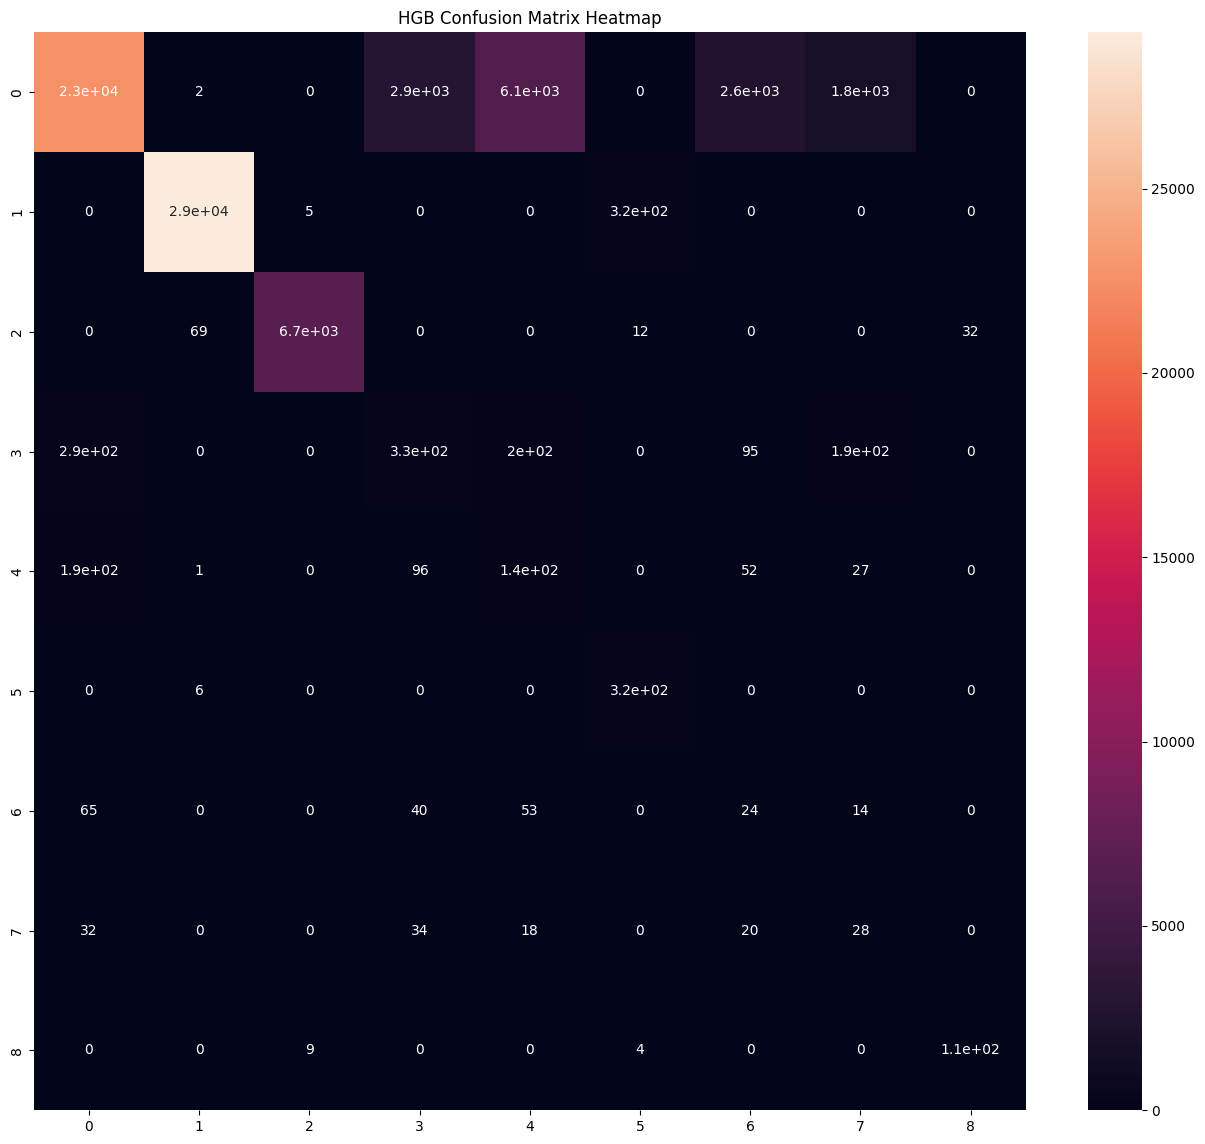

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_hgb, annot=True)
plt.title('HGB Confusion Matrix Heatmap')
plt.show()

###LightGBM Classifier

In [ ]:
good_loan = [0, 1, 2]

y_train_merge = y_train.isin(good_loan).astype(int)
y_validate_merge = y_validate.isin(good_loan).astype(int)

In [ ]:
classes = np.unique(y_train_merge)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_merge)
class_weights = dict(zip(classes, weights))

lgb_pipeline = Pipeline([
                        ('lgb', LGBMClassifier(boosting_type='gbdt', n_estimators=600,
                                               learning_rate=0.05, num_leaves=31, class_weight=class_weights,
                                               max_depth=6, random_state=42,
                                               min_child_samples=50))
                        ])

In [ ]:
lgb_pipeline.fit(x_train, y_train_merge)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 288937, number of negative: 9485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5620
[LightGBM] [Info] Number of data points in the train set: 298422, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Pipeline(steps=[('lgb',
                 LGBMClassifier(class_weight={np.int64(0): np.float64(15.731259884027411),
                                              np.int64(1): np.float64(0.5164136126560461)},
                                learning_rate=0.05, max_depth=6,
                                min_child_samples=50, n_estimators=600,
                                random_state=42))])

In [ ]:
y_lgb_prob_pred = lgb_pipeline.predict_proba(x_validate)[:,1]

Threshold Tuning

In [ ]:
for t in np.arange(0.15, 0.40, 0.05):
  preds = (y_lgb_prob_pred >= t).astype(int)
  f1 = f1_score(y_validate_merge, preds)
  print(f'Threshold {t:.2f} → F1 (bad_loan): {f1:.3f}')

Threshold 0.15 → F1 (bad_loan): 0.986
Threshold 0.20 → F1 (bad_loan): 0.984
Threshold 0.25 → F1 (bad_loan): 0.981
Threshold 0.30 → F1 (bad_loan): 0.975
Threshold 0.35 → F1 (bad_loan): 0.962


In [ ]:
best_threshold = 0.40

###Feature Importance

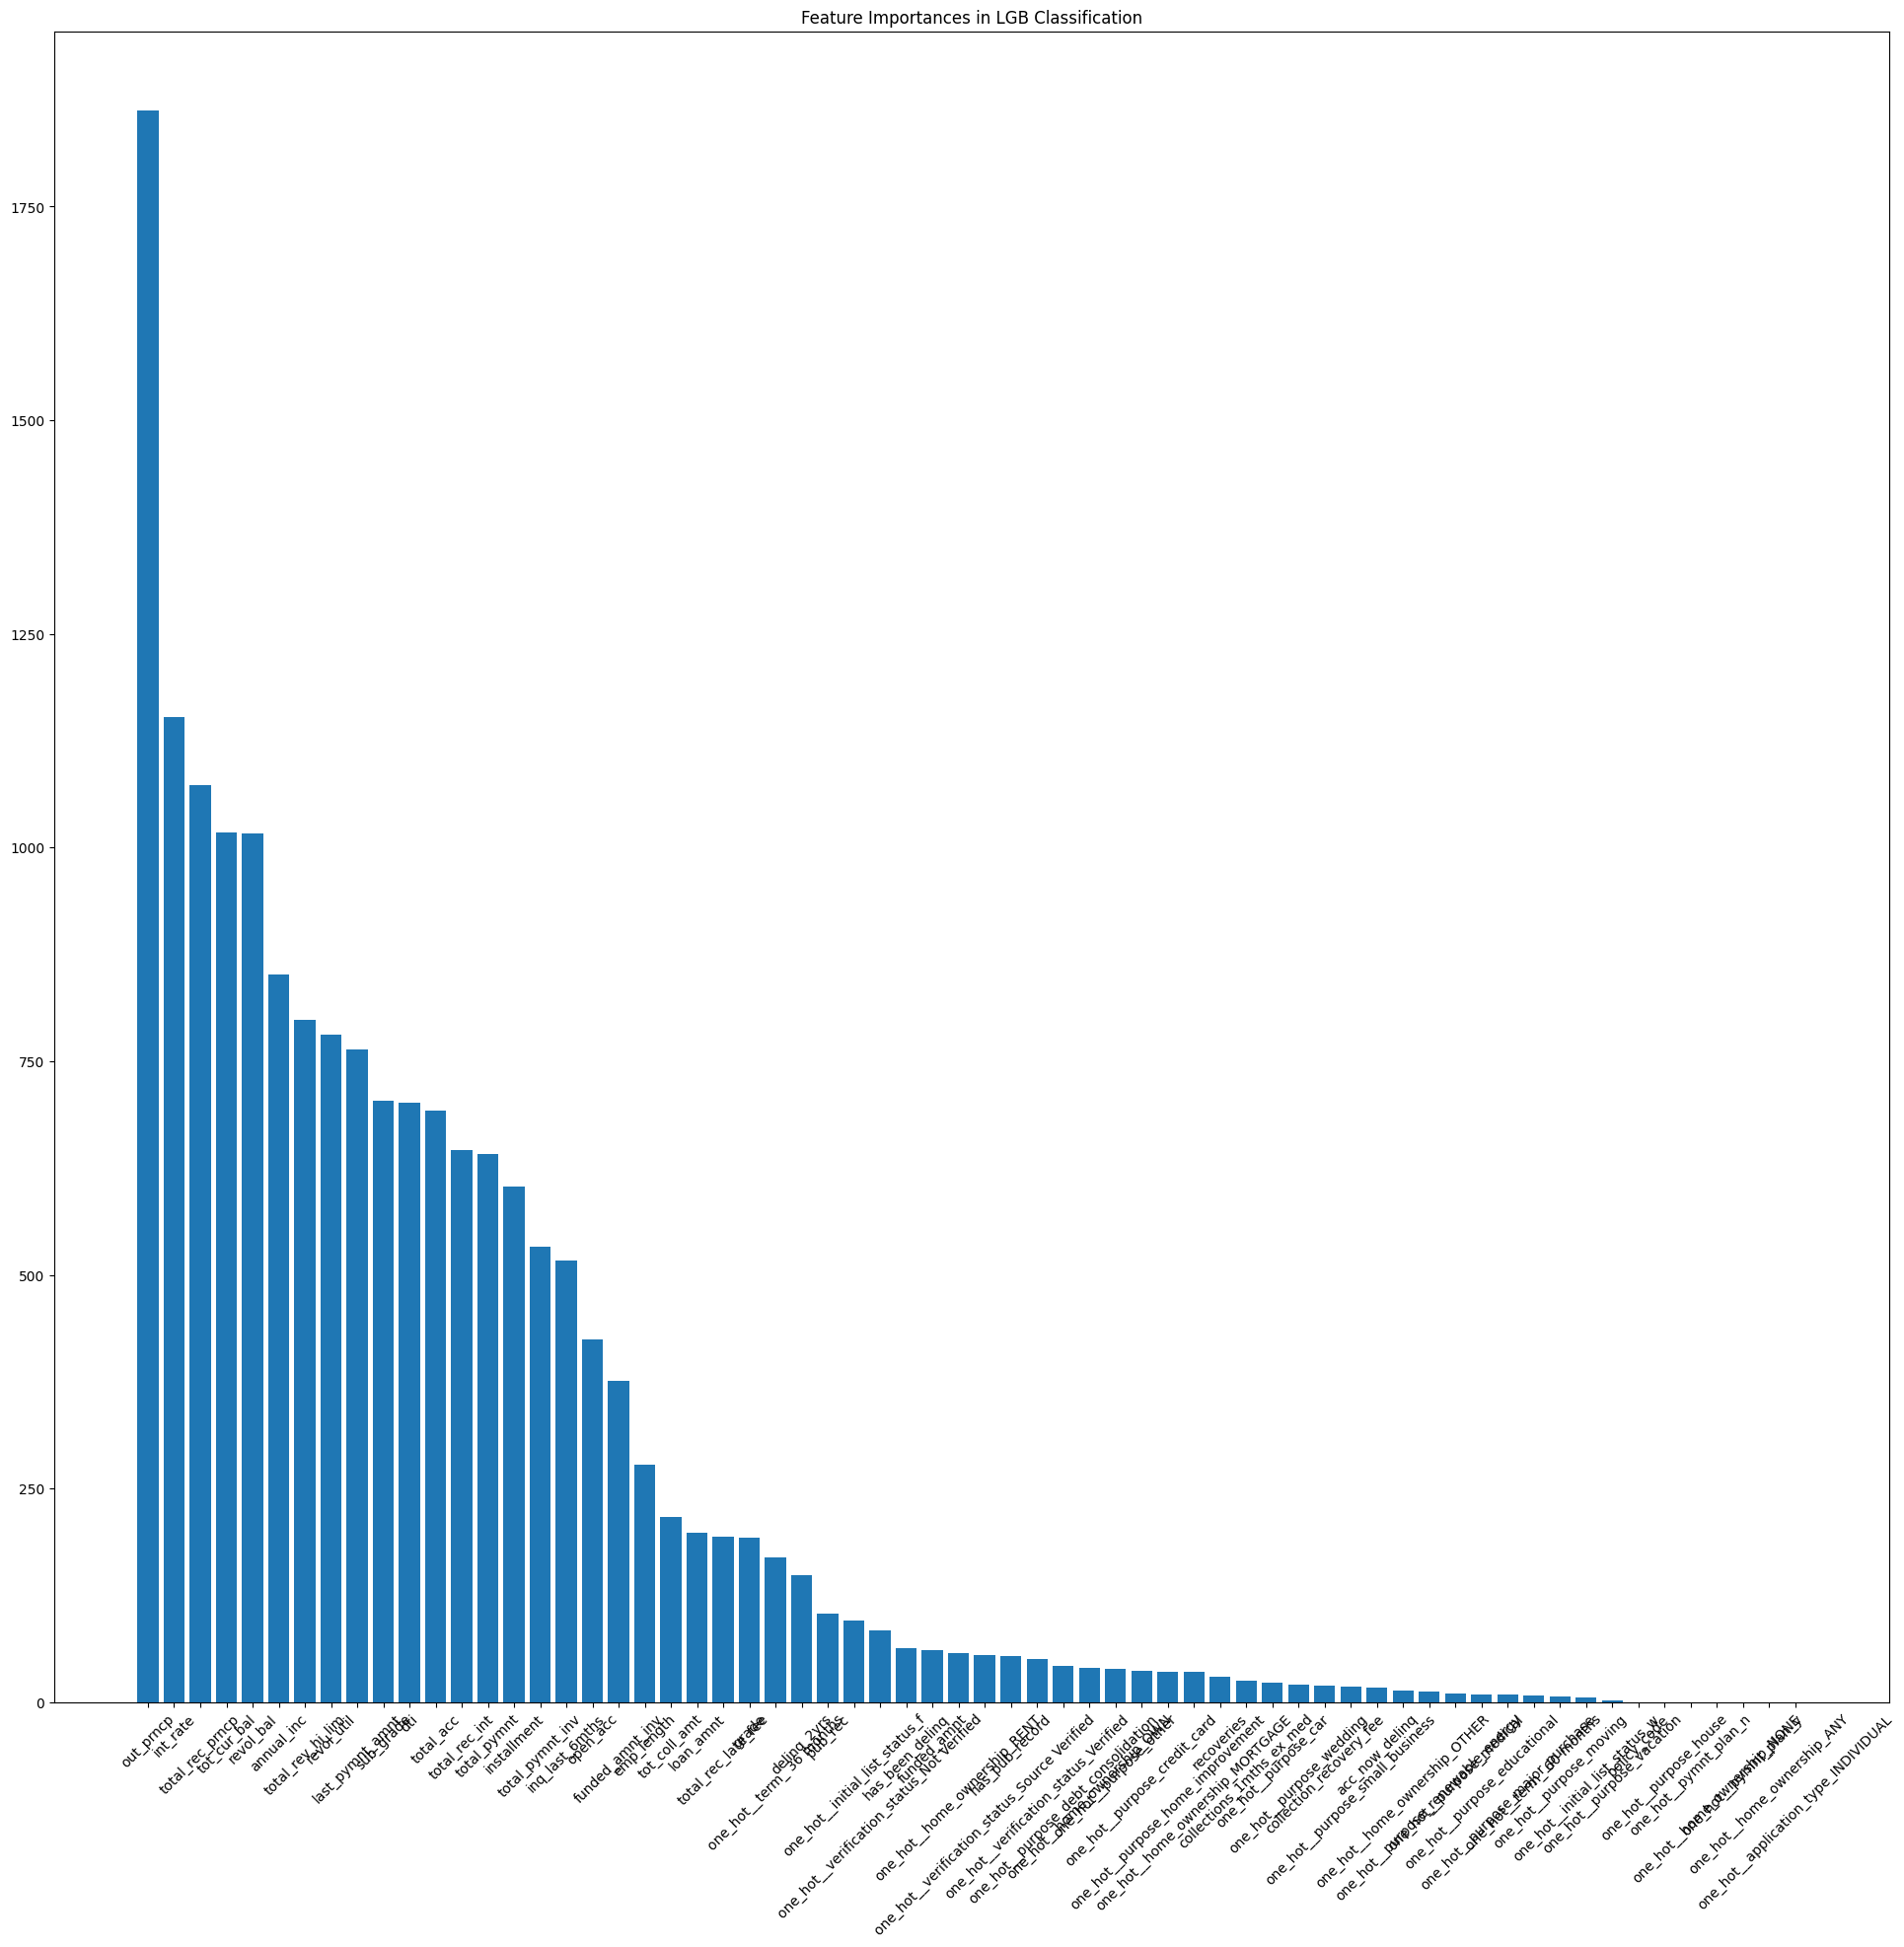

In [ ]:
lgb_model = lgb_pipeline.named_steps['lgb']

importance = lgb_model.feature_importances_
indices = np.argsort(importance)[::-1]
features = x.columns

plt.figure(figsize=(24,22))
plt.bar(range(x.shape[1]), importance[indices],  align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=45)
plt.title("Feature Importances in LGB Classification")
plt.show()

###Model Evaluation


Classification Report for Hist Gradient

In [ ]:
CR_lgb = classification_report(y_validate_merge, preds, target_names=['Bad Loan', 'Good Loan'], output_dict=True)
CR_lgb = pd.DataFrame(CR_lgb)
CR_lgb

,Bad Loan,Good Loan,accuracy,macro avg,weighted avg
precision,0.234905,0.984683,0.928424,0.609794,0.960845
recall,0.554384,0.940707,0.928424,0.747546,0.928424
f1-score,0.329987,0.962193,0.928424,0.646090,0.942092
support,2372.000000,72234.000000,0.928424,74606.000000,74606.000000


Classifcation Report Heatmap for LightGBM

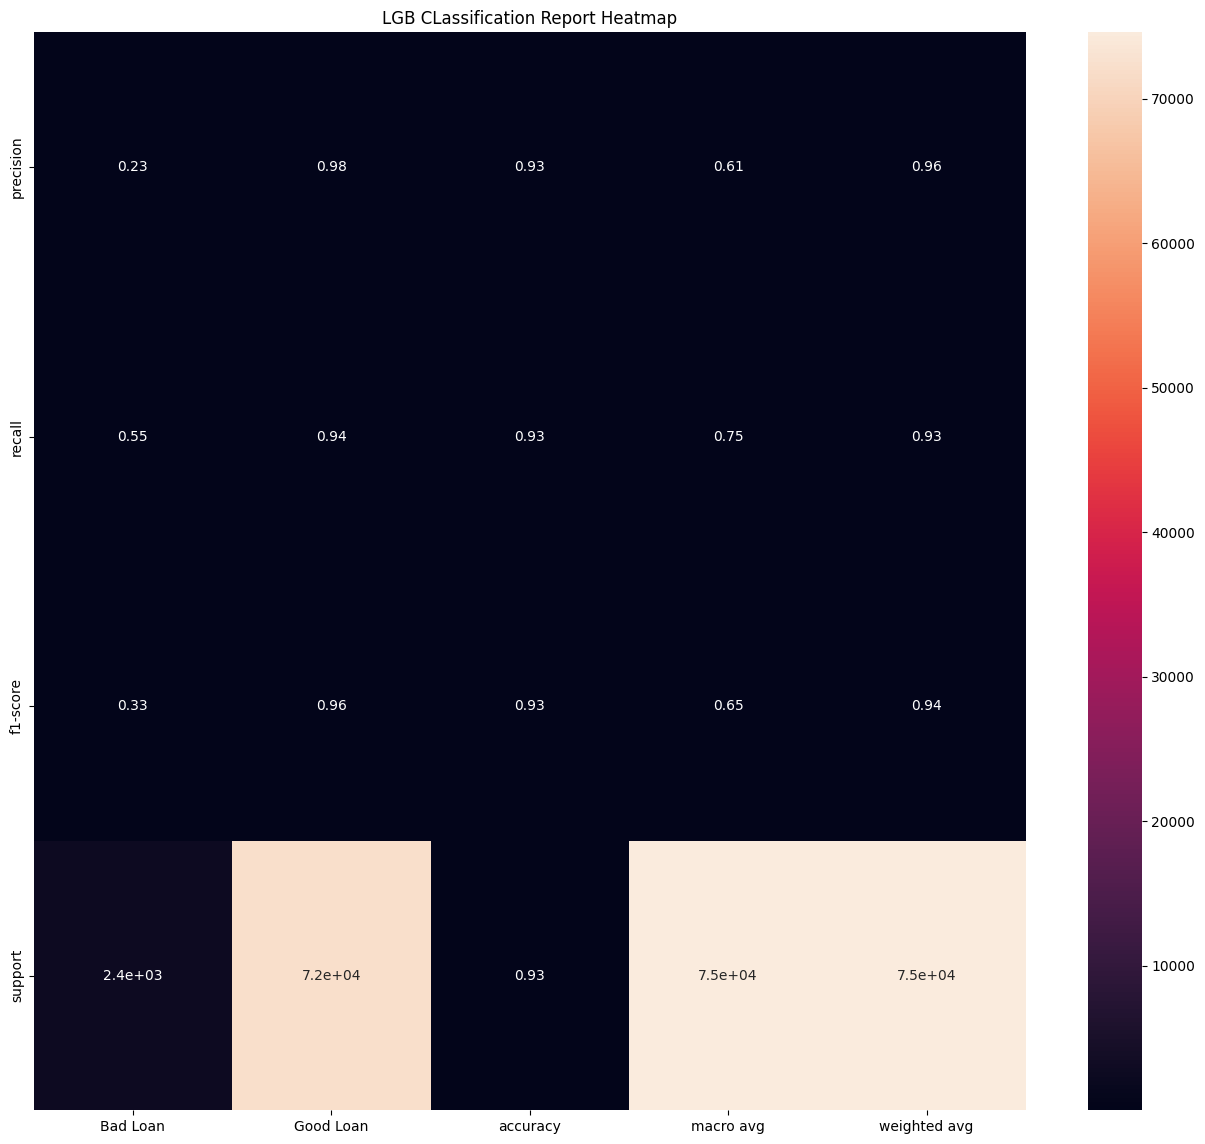

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_lgb, annot=True)
plt.title('LGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for LightGBM

In [ ]:
CM_lgb = confusion_matrix(y_validate_merge, preds)
CM_lgb = pd.DataFrame(CM_lgb)
CM_lgb

,0,1
0,1315,1057
1,4283,67951


Confusion Matrix Heatmap for LightGBM

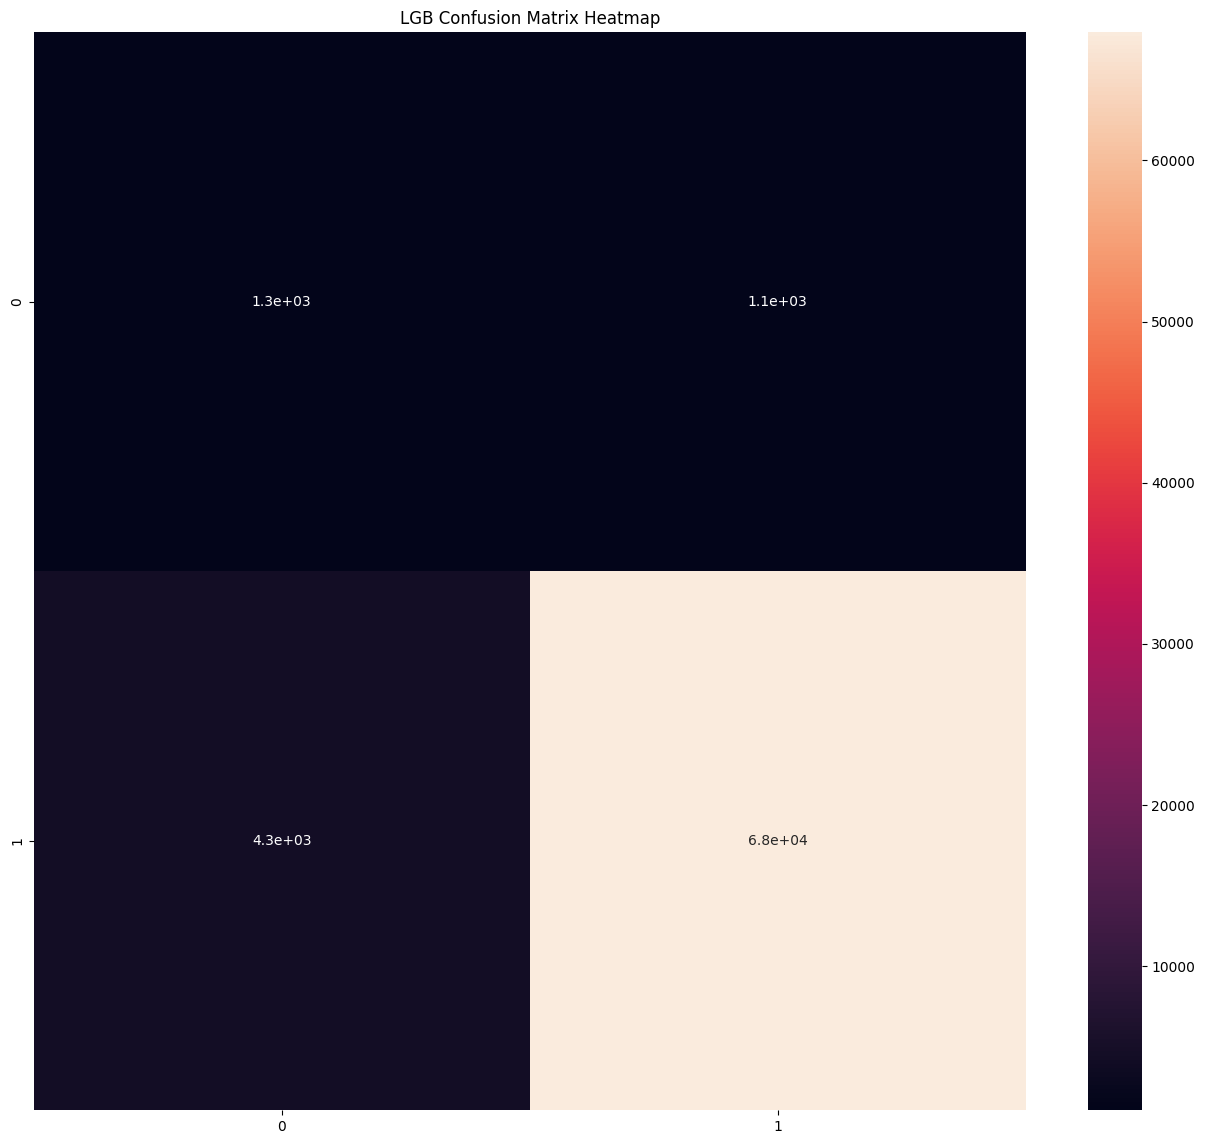

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_lgb, annot=True)
plt.title('LGB Confusion Matrix Heatmap')
plt.show()

##Importing Test Set

In [ ]:
df_test = pd.read_csv('/content/Default_Probability_Test_set')
df_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,has_pub_record,has_been_delinq
0,32500,32500,32500.0,60 months,14.99,773.01,C,C5,< 1 year,MORTGAGE,65000.0,Verified,Fully Paid,n,home_improvement,9.32,0.0,0.0,7.0,0.0,1208,4.3,20.0,f,0.00,0.00,38213.56000,38213.56,32500.00,5713.56,0.0,0.0,0.0,27391.42,0.0,1,INDIVIDUAL,0.0,0.0,6563.0,25100.0,0,0
1,11000,11000,11000.0,60 months,20.99,297.53,E,E4,10+ years,MORTGAGE,60000.0,Verified,Current,n,credit_card,24.19,1.0,0.0,18.0,0.0,13129,54.7,43.0,w,9214.67,9214.67,4450.12000,4450.12,1785.33,2664.79,0.0,0.0,0.0,297.53,0.0,1,INDIVIDUAL,0.0,0.0,107972.0,24000.0,0,1
2,30000,30000,30000.0,36 months,14.65,1034.83,C,C2,1 year,MORTGAGE,175000.0,Verified,Fully Paid,n,debt_consolidation,13.34,0.0,0.0,9.0,0.0,1906,22.4,38.0,f,0.00,0.00,32388.64000,32388.64,30000.00,2388.64,0.0,0.0,0.0,26181.92,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
3,14400,14400,14400.0,60 months,14.49,338.74,C,C4,2 years,MORTGAGE,66000.0,Source Verified,Current,n,debt_consolidation,17.69,0.0,0.0,12.0,0.0,12944,74.4,31.0,w,11901.76,11901.76,4719.18000,4719.18,2498.24,2220.94,0.0,0.0,0.0,338.74,0.0,1,INDIVIDUAL,0.0,0.0,139126.0,17400.0,0,0
4,15000,15000,14900.0,36 months,8.90,476.30,A,A5,10+ years,MORTGAGE,85000.0,Verified,Fully Paid,n,debt_consolidation,8.30,0.0,0.0,7.0,0.0,5902,67.8,20.0,f,0.00,0.00,16628.33315,16517.47,15000.00,1628.33,0.0,0.0,0.0,8066.82,0.0,1,INDIVIDUAL,0.0,0.0,179532.0,8700.0,0,1


###Test Set Transformation

In [ ]:
target_map = {'Current':0, 'Fully Paid':1, 'Charged Off':2, 'Late (31-120 days)':3,
              'In Grace Period':4, 'Does not meet the credit policy. Status:Fully Paid':5, 'Late (16-30 days)':6,
              'Default':7, 'Does not meet the credit policy. Status:Charged Off':8}

emp_map = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
            '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df_test['emp_length'] = df_test['emp_length'].str.strip()
df_test['emp_length'] = df_test['emp_length'].map(emp_map)

df_clean_test = preprocessor.transform(df_test)


In [ ]:
df_clean_test.columns = df_clean_test.columns.str.replace('1_|2_|3_|remainder_|,one_hot|ordinal|map|^__|^_', '', regex=True)

In [ ]:
df_clean_test.head()

,emp_length,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_1mths_ex_med,acc_now_delinq,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,revol_util,grade,sub_grade,one_hot__initial_list_status_f,one_hot__initial_list_status_w,one_hot__pymnt_plan_n,one_hot__pymnt_plan_y,one_hot__verification_status_Not Verified,one_hot__verification_status_Source Verified,one_hot__verification_status_Verified,one_hot__term_ 36 months,one_hot__term_ 60 months,one_hot__application_type_INDIVIDUAL,one_hot__home_ownership_ANY,one_hot__home_ownership_MORTGAGE,one_hot__home_ownership_NONE,one_hot__home_ownership_OTHER,one_hot__home_ownership_OWN,one_hot__home_ownership_RENT,one_hot__purpose_car,one_hot__purpose_credit_card,one_hot__purpose_debt_consolidation,one_hot__purpose_educational,one_hot__purpose_home_improvement,one_hot__purpose_house,one_hot__purpose_major_purchase,one_hot__purpose_medical,one_hot__purpose_moving,one_hot__purpose_other,one_hot__purpose_renewable_energy,one_hot__purpose_small_business,one_hot__purpose_vacation,one_hot__purpose_wedding,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,has_pub_record,has_been_delinq
0,0.0,0.0,6563.0,25100.0,0.0,0.0,65000.0,0.0,0.0,7.0,0.0,20.0,4.3,2.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32500,32500,32500.0,14.99,773.01,9.32,1208,0.00,0.00,38213.56000,38213.56,32500.00,5713.56,0.0,0.0,0.0,27391.42,1,0,0
1,10.0,0.0,107972.0,24000.0,0.0,0.0,60000.0,1.0,0.0,18.0,0.0,43.0,54.7,4.0,23.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11000,11000,11000.0,20.99,297.53,24.19,13129,9214.67,9214.67,4450.12000,4450.12,1785.33,2664.79,0.0,0.0,0.0,297.53,1,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,175000.0,0.0,0.0,9.0,0.0,38.0,22.4,2.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30000,30000,30000.0,14.65,1034.83,13.34,1906,0.00,0.00,32388.64000,32388.64,30000.00,2388.64,0.0,0.0,0.0,26181.92,1,0,1
3,2.0,0.0,139126.0,17400.0,0.0,0.0,66000.0,0.0,0.0,12.0,0.0,31.0,74.4,2.0,13.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14400,14400,14400.0,14.49,338.74,17.69,12944,11901.76,11901.76,4719.18000,4719.18,2498.24,2220.94,0.0,0.0,0.0,338.74,1,0,0
4,10.0,0.0,179532.0,8700.0,0.0,0.0,85000.0,0.0,0.0,7.0,0.0,20.0,67.8,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,15000,15000,14900.0,8.90,476.30,8.30,5902,0.00,0.00,16628.33315,16517.47,15000.00,1628.33,0.0,0.0,0.0,8066.82,1,0,1


Feature-Target Separation

In [ ]:
x_test = df_clean_test.drop(['loan_status', 'out_prncp_inv'], axis=1)
y_test = df_clean_test['loan_status']

###LightGBM Model Evaluation

In [ ]:
good_loan = [0, 1, 2]

y_test_merge = y_test.isin(good_loan).astype(int)

In [ ]:
y_prob_pred = lgb_pipeline.predict_proba(x_test)[:,1]

In [ ]:
y_test_pred = (y_prob_pred >= best_threshold).astype(int)

Classification Report for LightGBM

In [ ]:
CR = classification_report(y_test_merge, y_test_pred, output_dict=True)
CR = pd.DataFrame(CR)
CR

,0,1,accuracy,macro avg,weighted avg
precision,0.177251,0.986326,0.895482,0.581789,0.960403
recall,0.621151,0.904563,0.895482,0.762857,0.895482
f1-score,0.275801,0.943677,0.895482,0.609739,0.922278
support,2988.000000,90269.000000,0.895482,93257.000000,93257.000000


Classification Report Heatmap for LightGBM

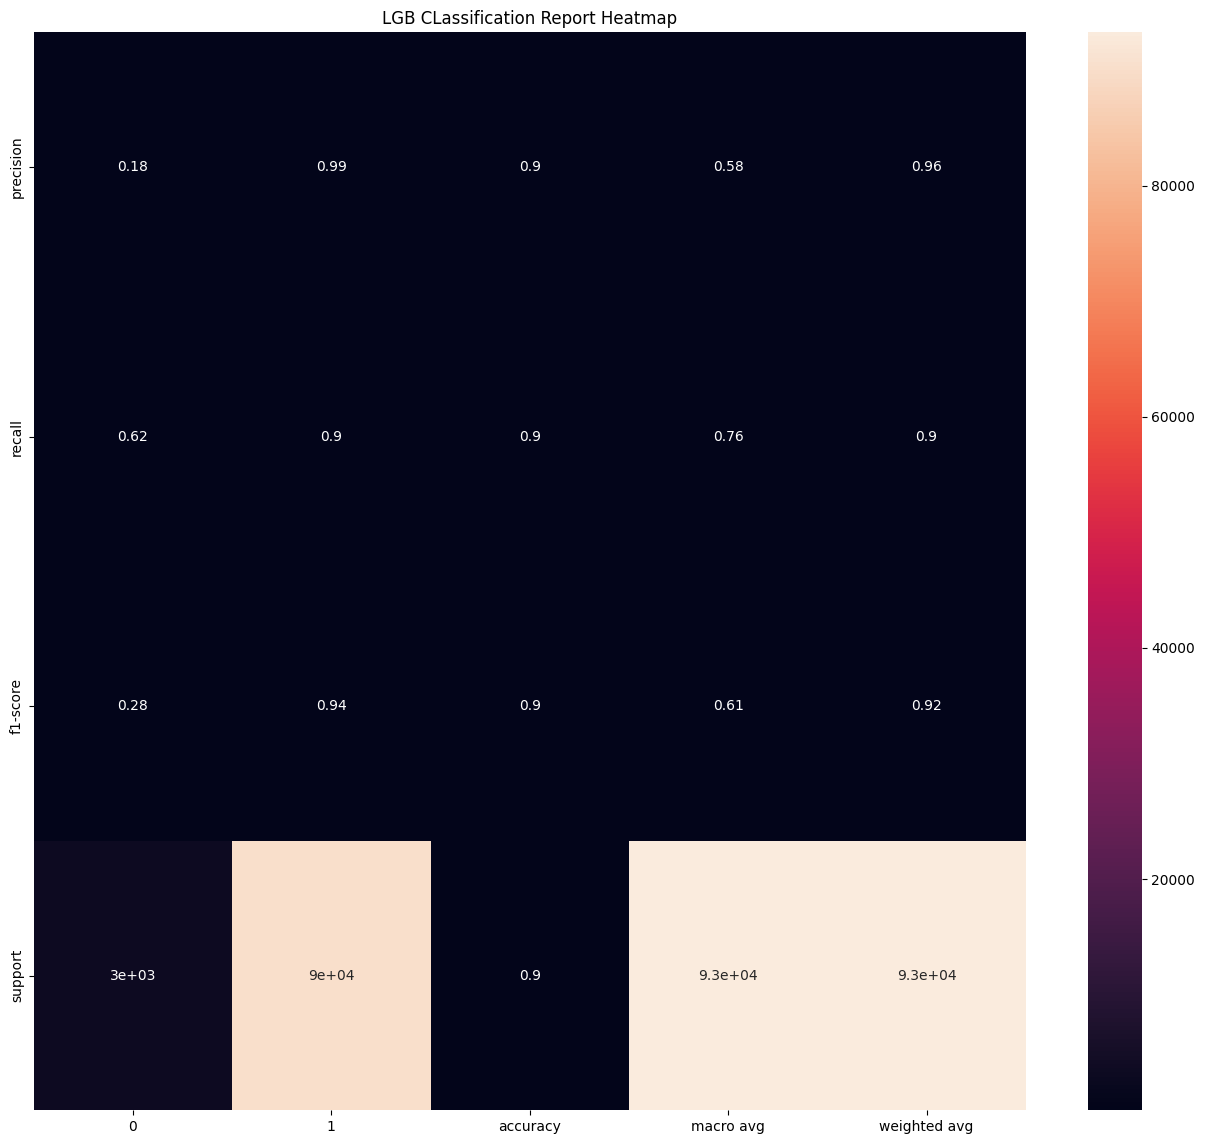

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR, annot=True)
plt.title('LGB CLassification Report Heatmap')
plt.show()

Confusion Matrix for LightGBM

In [ ]:
CM = confusion_matrix(y_test_merge, y_test_pred)
CM = pd.DataFrame(CM)
CM

,0,1
0,1856,1132
1,8615,81654


Confusion Matrix Heatmap for LightGBM

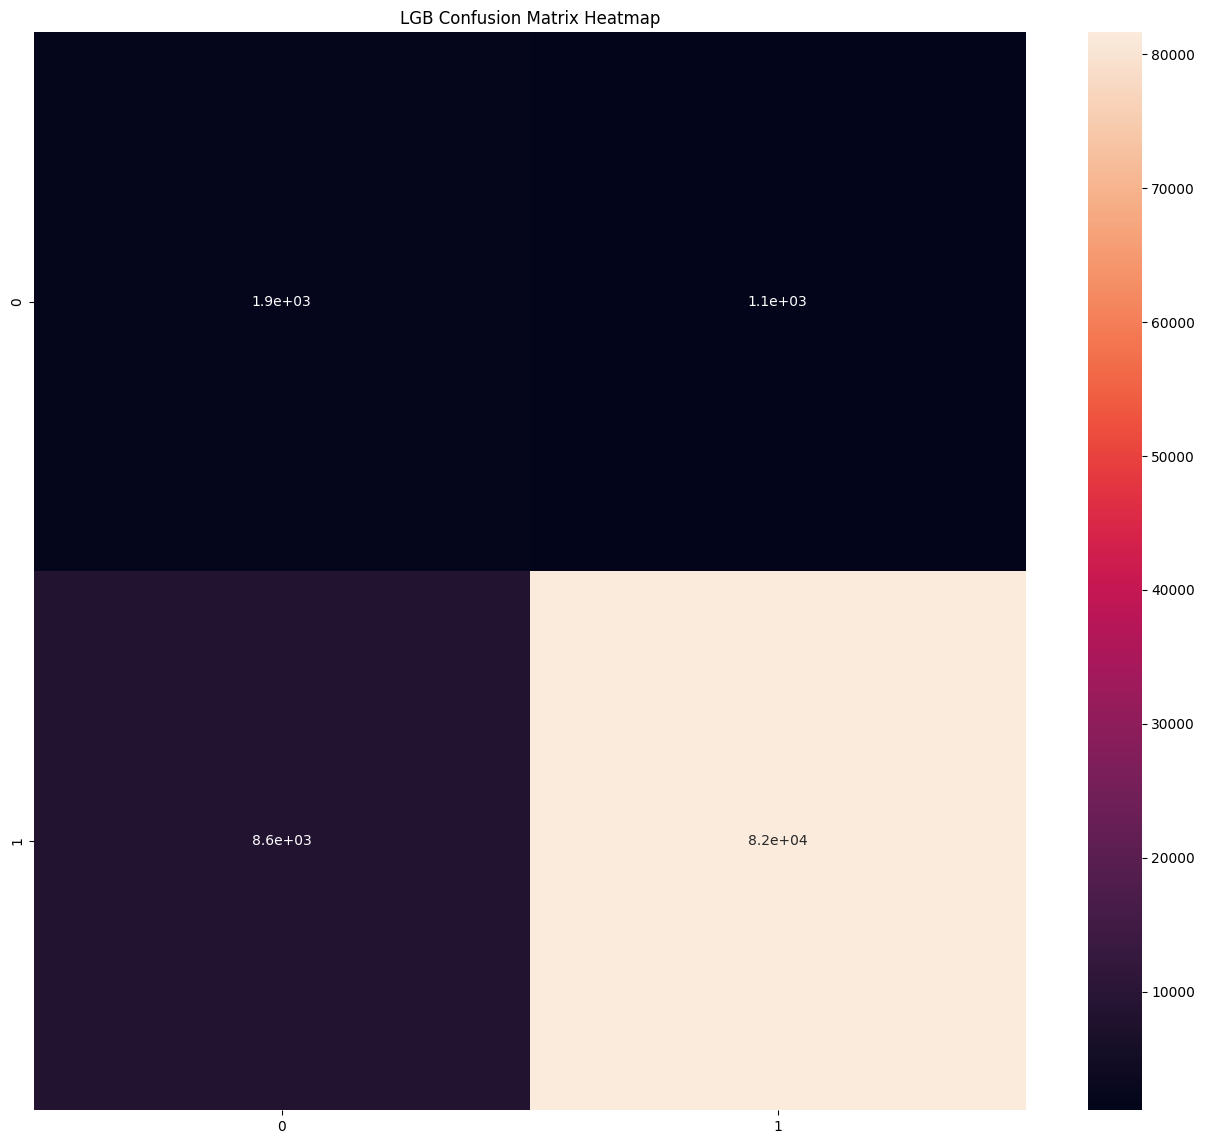

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM, annot=True)
plt.title('LGB Confusion Matrix Heatmap')
plt.show()